# EDA & Flight Fare Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

1. **Data Collection:**
   - Gather the dataset from various sources such as databases, files, APIs, etc.
   - Ensure the dataset is representative and relevant to the analysis objectives.


In [2]:
data = pd.read_excel(r"C:\Users\bharathreddybollu\Downloads\Data_Train.xlsx")

2. **Initial Data Inspection:**
   - Load the dataset into your analysis environment (Python).
   - Check the first few rows to understand the structure and format of the data (`head()` function in Python).
   - Check for the number of rows and columns in the dataset.
   - Review the data types of each column.


In [3]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [4]:
print("Dataset shape, ",data.shape)

Dataset shape,  (10683, 11)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

3. **Data Cleaning:**
   - Handle missing values by imputation, deletion, or interpolation.
   - Remove duplicate records if present.
   - Handle outliers by applying statistical techniques or domain knowledge.
   - Convert data types if necessary (e.g., converting categorical variables to appropriate types).


In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data[data["Route"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,Null,7480


In [9]:
data = data.drop(9039)

In [10]:
data.shape

(10682, 11)

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,Null,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,Null,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,Null,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,Null,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,Null,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,Null,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [13]:
duplicate_data = data[data.duplicated()].index
print(duplicate_data)

Index([  683,  1061,  1348,  1418,  1674,  1685,  1704,  1807,  1891,  1971,
       ...
       10533, 10547, 10554, 10573, 10589, 10594, 10616, 10634, 10672, 10673],
      dtype='int64', length=220)


In [14]:
data = data.drop_duplicates()

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [16]:
data.shape

(10462, 11)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [18]:
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

First we have to convert the object datatype into datmetime datatype so it will become easy to read the values and predict

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


4. **Feature Engineering:** Create new features or transform existing ones to improve model performance. This may involve:
   - Creating dummy variables for categorical variables.
   - Transforming numerical variables (e.g., log transformation, scaling).
   - Extracting features from date-time variables.
   - Create new features from existing ones based on domain knowledge or insights gained during exploration.
   - Transform variables (e.g., log transformation, scaling) to meet modeling assumptions or improve performance.
   - Encode categorical variables using techniques such as one-hot encoding or label encoding.

Ultimately, there's no strict rule about that when to apply Feature Transformation Before Exploration or Feature Transformation after Explorationthe sequence, and it often involves an iterative process where you explore the data, apply transformations, and refine your understanding based on the transformed data. It's essential to consider the goals of your analysis, the characteristics of your dataset, and the specific transformations you plan to apply when deciding on the sequence.

In [20]:
# Now we extract the date and month from Date_of_Journey and creating new colums like Journey_date and Journey_month
# And here we are using to_datetime to convert the feature like Date_of_Journey from string to datetime column

In [21]:
#Extracting date
data["Journey_date"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

#Extracting month
data["Journey_month"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [22]:
# Since year is same we are not considering it and we might drop it in future
data["Journey_year"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.year
data["Journey_year"].value_counts()

Journey_year
2019    10462
Name: count, dtype: int64

In [23]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,9,6,2019


In [24]:
data.shape

(10462, 14)

In [25]:
data["Journey_year"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.year
data["Journey_year"].value_counts()

Journey_year
2019    10462
Name: count, dtype: int64

In [26]:
# Now we extract the hour and minute from Dep_Time and creating new colums like Departure_hour and Departure_minute

#Extracting hour
data["Departure_hour"] = pd.to_datetime(data.Dep_Time).dt.hour

#Extracting minute
data["Departure_minute"] = pd.to_datetime(data.Dep_Time).dt.minute

In [27]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Departure_hour,Departure_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,2019,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5,2019,5,50


In [28]:
# Now we extract the hour and minute from Arrival_Time and creating new colums like Arrival_hour and Arrival_minute

#Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

#Extracting Minutes
data["Arrival_minute"] = pd.to_datetime(data.Arrival_Time).dt.minute

In [29]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5,2019,5,50,13,15


In [30]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_date         int32
Journey_month        int32
Journey_year         int32
Departure_hour       int32
Departure_minute     int32
Arrival_hour         int32
Arrival_minute       int32
dtype: object

In [31]:
Duration = data["Duration"].str.split(" ",expand=True)
Duration.columns = ["Duration_hours","Duration_minutes"]
Duration

,Duration_hours,Duration_minutes
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [32]:
Duration["Duration_hours"].str.replace(r'[a-z]','',regex=True)
Duration["Duration_minutes"].str.replace(r'[a-z]','',regex=True)

0          50
1          25
2        None
3          25
4          45
         ... 
10678      30
10679      35
10680    None
10681      40
10682      20
Name: Duration_minutes, Length: 10462, dtype: object

In [33]:
Duration["Duration_hours"] = Duration["Duration_hours"].str.replace(r'[a-z]','',regex=True)
Duration["Duration_minutes"] = Duration["Duration_minutes"].str.replace(r'[a-z]','',regex=True)
Duration.head()

,Duration_hours,Duration_minutes
0,2,50
1,7,25
2,19,None
3,5,25
4,4,45


In [34]:
Duration.isnull().sum()

Duration_hours         0
Duration_minutes    1006
dtype: int64

In [35]:
Duration["Duration_minutes"].isnull().sum()

1006

In [36]:
Duration["Duration_minutes"] = Duration["Duration_minutes"].fillna(0)

In [37]:
Duration.isnull().sum()

Duration_hours      0
Duration_minutes    0
dtype: int64

In [38]:
data["Duration_hours"] = Duration["Duration_hours"]
data["Duration_minutes"] = Duration["Duration_minutes"]

In [39]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,3,2019,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,1,5,2019,5,50,13,15,7,25


In [40]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [41]:
data["Total_Stops"] = data["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [42]:
data["Total_Stops"].isnull().sum()

0

In [43]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,3897,24,3,2019,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,Null,13882,9,6,2019,9,25,4,25,19,0


In [44]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])
data["Weekend"] = (data["Date_of_Journey"].dt.dayofweek >= 5).astype(int)
# 0 for weekdays (Monday to Friday), 1 for weekends (Saturday and Sunday)

In [45]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_date,Journey_month,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,24,3,2019,22,20,1,10,2,50,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,1,5,2019,5,50,13,15,7,25,0


In [46]:
data["Night_Journey"] = (data["Departure_hour"]>=19).astype(int)

In [47]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_month,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,3,2019,22,20,1,10,2,50,1,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,5,2019,5,50,13,15,7,25,0,0


In [48]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])
data["Day_of_week"] = data["Date_of_Journey"].dt.dayofweek

In [49]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey,Day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,2019,22,20,1,10,2,50,1,1,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,2019,5,50,13,15,7,25,0,0,2


In [50]:
data["Day_of_week"] = data["Day_of_week"].replace({ 0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'})

In [51]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey,Day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,2019,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,2019,5,50,13,15,7,25,0,0,Wednesday


In [52]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [53]:
data["Airline"].nunique()

12

In [54]:
data["Airline"] = data["Airline"].replace({'Vistara Premium economy':'Vistara','Jet Airways Business':'Jet Airways','Multiple carriers Premium economy':'Multiple carriers'})

In [55]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [56]:
data["Airline"].nunique()

9

In [57]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey,Day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,2019,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,2019,5,50,13,15,7,25,0,0,Wednesday


In [58]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [59]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [60]:
data["Route"].nunique()

128

5. **Data Exploration:**
   - Summarize basic statistics for numerical variables (mean, median, standard deviation, etc.).
   - Exploring categorical variables by examining unique values and value counts.
   
   - Visualize data distributions using histograms, density plots, and box plots.
   - Explore categorical variables using frequency tables, bar plots, and pie charts.
 


In [61]:
def data_types(col):
    return col.dtypes

In [62]:
for i in data.columns:
    dtype = data_types(data[i])
    print("Column ->>",i,"Data type is -->>>",dtype)

Column ->> Airline Data type is -->>> object
Column ->> Date_of_Journey Data type is -->>> datetime64[ns]
Column ->> Source Data type is -->>> object
Column ->> Destination Data type is -->>> object
Column ->> Route Data type is -->>> object
Column ->> Dep_Time Data type is -->>> object
Column ->> Arrival_Time Data type is -->>> object
Column ->> Duration Data type is -->>> object
Column ->> Total_Stops Data type is -->>> int64
Column ->> Additional_Info Data type is -->>> object
Column ->> Price Data type is -->>> int64
Column ->> Journey_date Data type is -->>> int32
Column ->> Journey_month Data type is -->>> int32
Column ->> Journey_year Data type is -->>> int32
Column ->> Departure_hour Data type is -->>> int32
Column ->> Departure_minute Data type is -->>> int32
Column ->> Arrival_hour Data type is -->>> int32
Column ->> Arrival_minute Data type is -->>> int32
Column ->> Duration_hours Data type is -->>> object
Column ->> Duration_minutes Data type is -->>> object
Column ->> Week

In [63]:
data.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                  int64
Additional_Info             object
Price                        int64
Journey_date                 int32
Journey_month                int32
Journey_year                 int32
Departure_hour               int32
Departure_minute             int32
Arrival_hour                 int32
Arrival_minute               int32
Duration_hours              object
Duration_minutes            object
Weekend                      int32
Night_Journey                int32
Day_of_week                 object
dtype: object

In [64]:
data["Duration_hours"] = data["Duration_hours"].astype('int32')
data["Duration_minutes"] = data["Duration_minutes"].astype('int32')

In [65]:
data.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time                    object
Arrival_Time                object
Duration                    object
Total_Stops                  int64
Additional_Info             object
Price                        int64
Journey_date                 int32
Journey_month                int32
Journey_year                 int32
Departure_hour               int32
Departure_minute             int32
Arrival_hour                 int32
Arrival_minute               int32
Duration_hours               int32
Duration_minutes             int32
Weekend                      int32
Night_Journey                int32
Day_of_week                 object
dtype: object

In [66]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date_of_Journey,10462,2019-05-04 13:38:33.056776960,2019-03-01 00:00:00,2019-03-27 00:00:00,2019-05-15 00:00:00,2019-06-06 00:00:00,2019-06-27 00:00:00,NaN
Total_Stops,10462.0,0.802332,0.0,0.0,1.0,1.0,4.0,0.660609
Price,10462.0,9026.790289,1759.0,5224.0,8266.0,12344.75,79512.0,4624.849541
Journey_date,10462.0,13.4632,1.0,6.0,12.0,21.0,27.0,8.467493
Journey_month,10462.0,4.701491,3.0,3.0,5.0,6.0,6.0,1.163802
Journey_year,10462.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,0.0
Departure_hour,10462.0,12.478494,0.0,8.0,11.0,18.0,23.0,5.727227
Departure_minute,10462.0,24.404989,0.0,5.0,25.0,40.0,55.0,18.815719
Arrival_hour,10462.0,13.387689,0.0,8.0,14.0,19.0,23.0,6.855547
Arrival_minute,10462.0,24.719939,0.0,10.0,25.0,35.0,55.0,16.57045


In [67]:
data.describe(include="O")

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Day_of_week
count,10462,10462,10462,10462,10462,10462,10462,10462,10462
unique,9,5,6,128,222,1343,368,10,7
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,Null,Wednesday
freq,3706,4345,4345,2376,233,412,544,8184,2048


In [68]:
pd.crosstab(data["Airline"],data["Source"])

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Airline,,,,,
Air Asia,89,0,80,150,0
Air India,329,25,703,501,136
GoAir,93,0,76,25,0
IndiGo,513,184,705,445,196
Jet Airways,791,0,1440,1256,219
Multiple carriers,0,0,1209,0,0
SpiceJet,178,128,87,300,122
Trujet,0,0,0,0,1
Vistara,186,44,45,183,23


In [69]:
pd.crosstab(index=data["Airline"],columns = data["Destination"]).T

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
Destination,,,,,,,,,
Banglore,150,501,25,445,1256,0,300,0,183
Cochin,80,703,76,705,1440,1209,87,0,45
Delhi,71,120,69,366,370,0,137,0,132
Hyderabad,0,136,0,196,219,0,122,1,23
Kolkata,0,25,0,184,0,0,128,0,44
New Delhi,18,209,24,147,421,0,41,0,54


In [70]:
pd.crosstab(data["Airline"],columns = [data["Source"],data["Destination"]]).T

Airline               Air Asia  Air India  GoAir  IndiGo  Jet Airways  \
Source   Destination                                                    
Banglore Delhi              71        120     69     366          370   
         New Delhi          18        209     24     147          421   
Chennai  Kolkata             0         25      0     184            0   
Delhi    Cochin             80        703     76     705         1440   
Kolkata  Banglore          150        501     25     445         1256   
Mumbai   Hyderabad           0        136      0     196          219   

Airline               Multiple carriers  SpiceJet  Trujet  Vistara  
Source   Destination                                                
Banglore Delhi                        0       137       0      132  
         New Delhi                    0        41       0       54  
Chennai  Kolkata                      0       128       0       44  
Delhi    Cochin                    1209        87       0       45  
Kolkata  Banglore                     0       300       0      183  
Mumbai   Hyderabad                    0       122       1       23

6. **Univariate Analysis:** Analyze each feature individually to understand its distribution and characteristics. This includes:
   - Histograms,Boxplot and density plots for numerical variables.
   - Bar plots and Pie charts for categorical variables.
   - Box plots for visualizing distributions, outliers, and variability.


In [71]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey,Day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,2019,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,2019,5,50,13,15,7,25,0,0,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,Null,...,2019,9,25,4,25,19,0,1,0,Sunday


In [72]:
data["Additional_Info"].value_counts()

Additional_Info
Null                            8184
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Null                               1
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [73]:
numerical_features = []
categorical_features = []

for i in data.columns:
    if data[i].dtypes == "int32" or data[i].dtypes == "int64":
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [74]:
print("Numerical or int type features are :",numerical_features)
print()
print("Categorical or Object type features are :",categorical_features)

Numerical or int type features are : ['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Journey_year', 'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minutes', 'Weekend', 'Night_Journey']

Categorical or Object type features are : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Day_of_week']


In [75]:
airline_brands = data["Airline"].value_counts()
categories = airline_brands.index
values = airline_brands.values

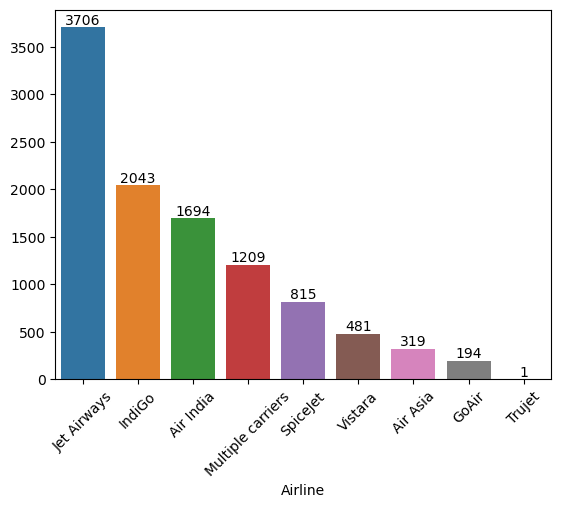

In [76]:
sns.barplot(x=categories,y=values)
for i in range(len(categories)):
    plt.text(x=i, y=values[i], s=values[i], ha='center', va='bottom')
plt.xticks(rotation=45)    
plt.show()

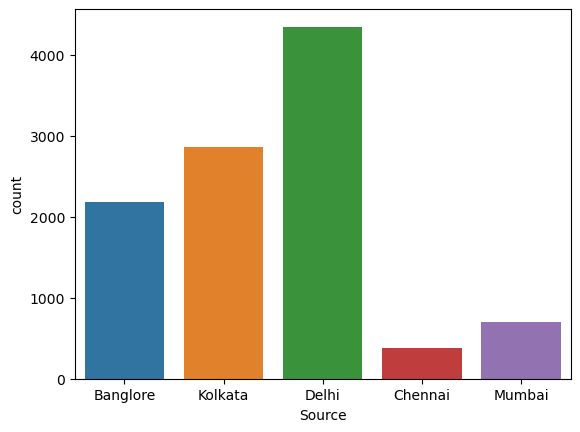

In [77]:
sns.countplot(x=data["Source"])
plt.show()

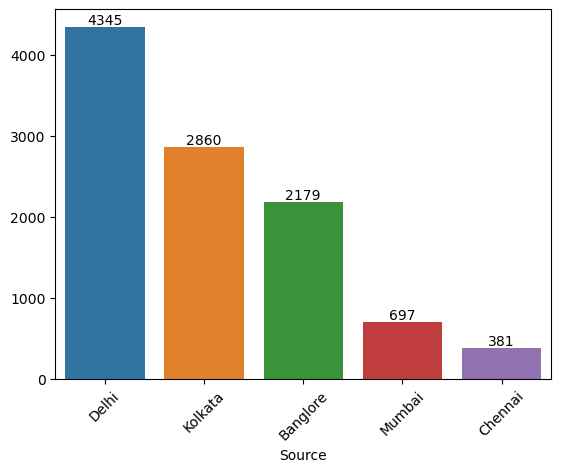

In [78]:
source = data["Source"].value_counts()
category = source.index
values = source.values
sns.barplot(x=category,y=values)
for i in range(len(category)):
    plt.text(x=i, y=values[i], s=values[i], ha='center', va='bottom')
plt.xticks(rotation=45)    
plt.show()

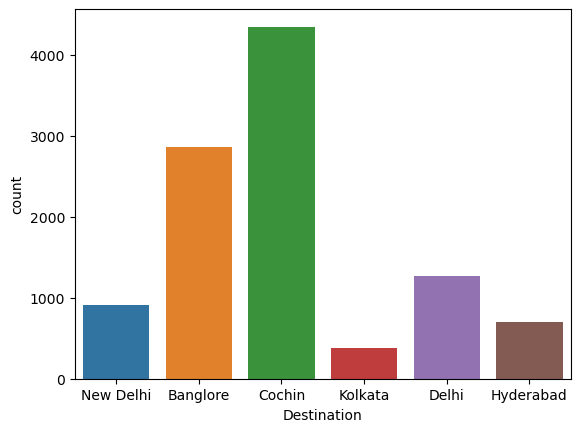

In [79]:
sns.countplot(x=data["Destination"])
plt.show()

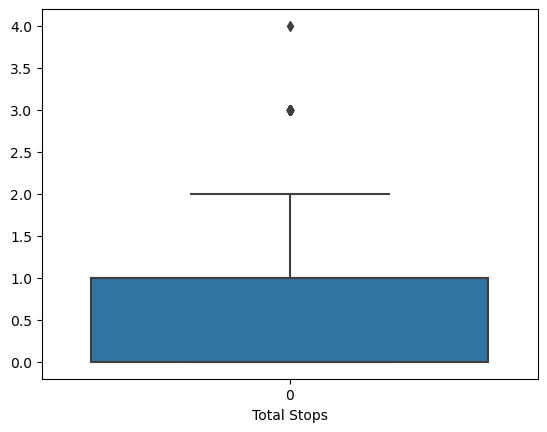

In [80]:
sns.boxplot(data["Total_Stops"])
plt.xlabel("Total Stops")
plt.show()

<Axes: xlabel='Total_Stops', ylabel='count'>

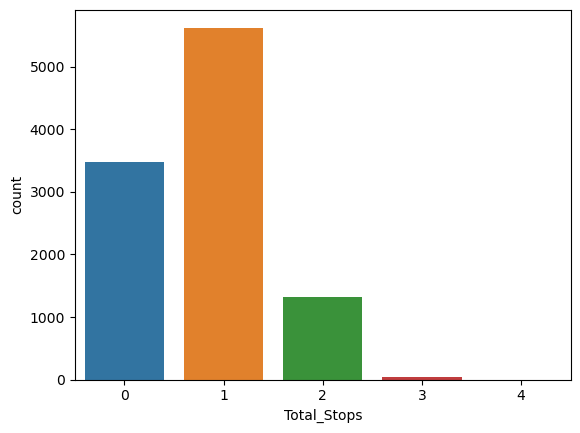

In [81]:
sns.countplot(x=data["Total_Stops"])

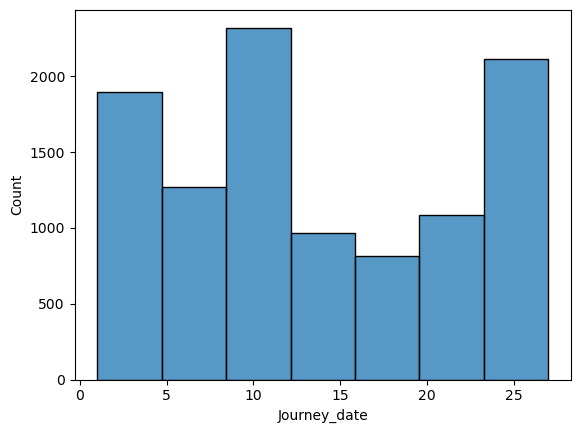

In [82]:
sns.histplot(data["Journey_date"],bins=7)
plt.show()

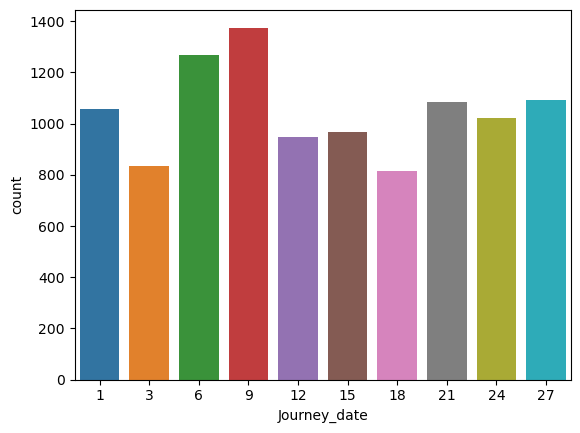

In [83]:
sns.countplot(x=data["Journey_date"])
plt.show()

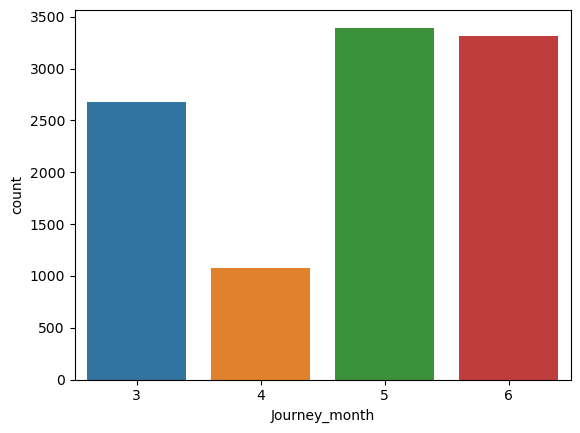

In [84]:
sns.countplot(x=data["Journey_month"])
plt.show()

In [85]:
# 0 for weekdays (Monday to Friday), 1 for weekends (Saturday and Sunday)

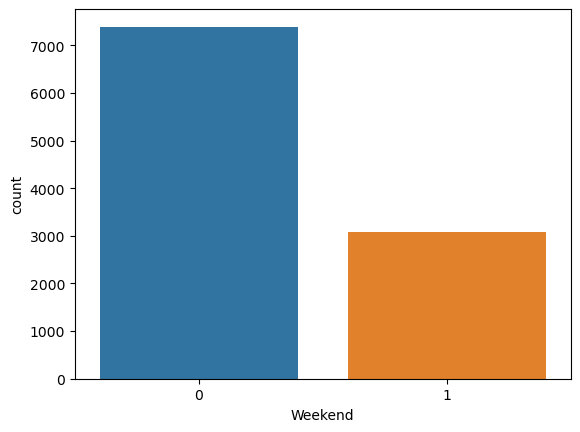

In [86]:
sns.countplot(x=data["Weekend"])
plt.show()

In [87]:
data["Night_Journey"].value_counts()

Night_Journey
0    8274
1    2188
Name: count, dtype: int64

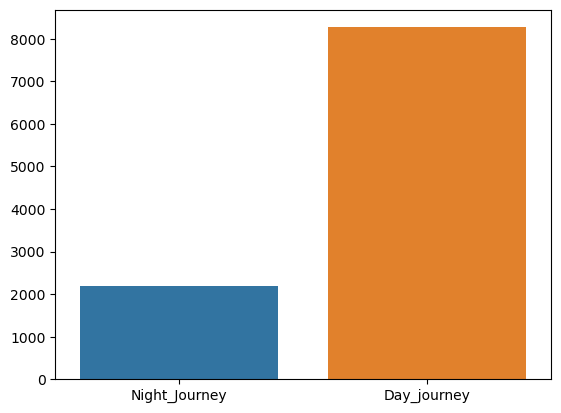

In [88]:
sns.barplot(x=["Night_Journey","Day_journey"],y=[2188,8274])
plt.show()

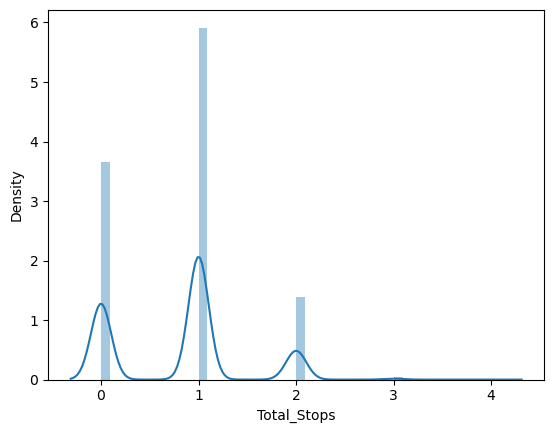

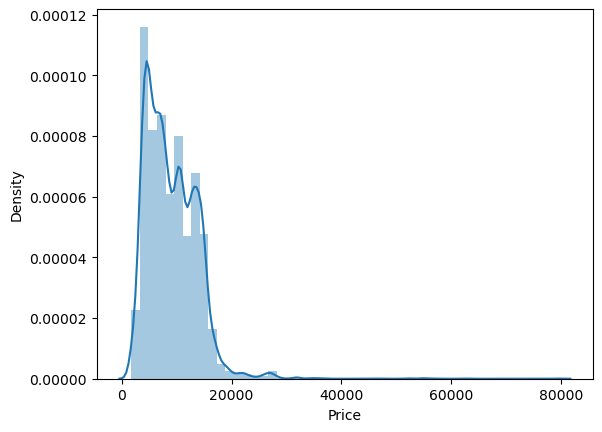

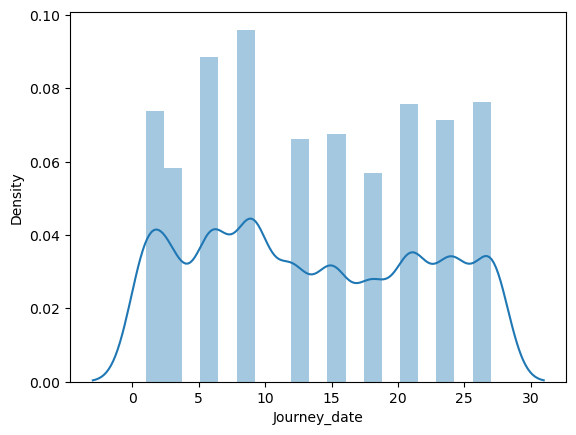

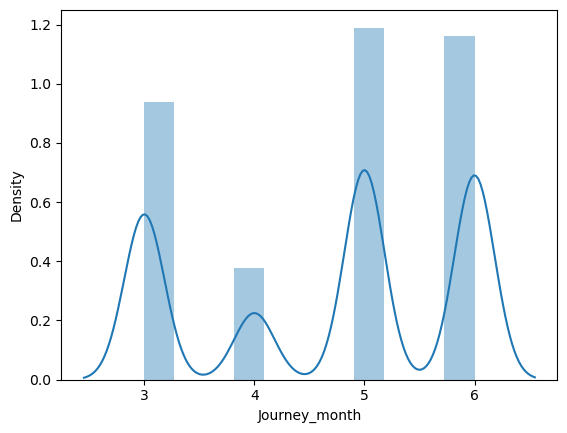

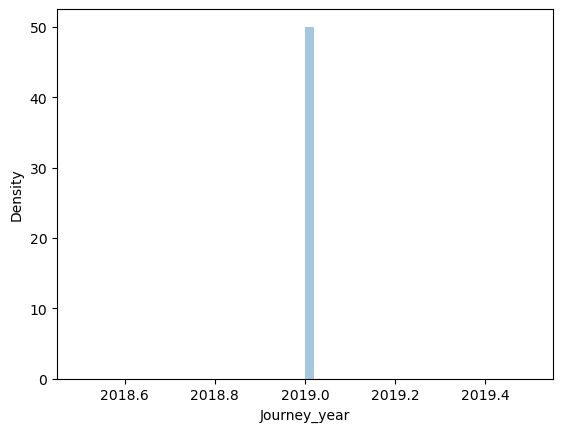

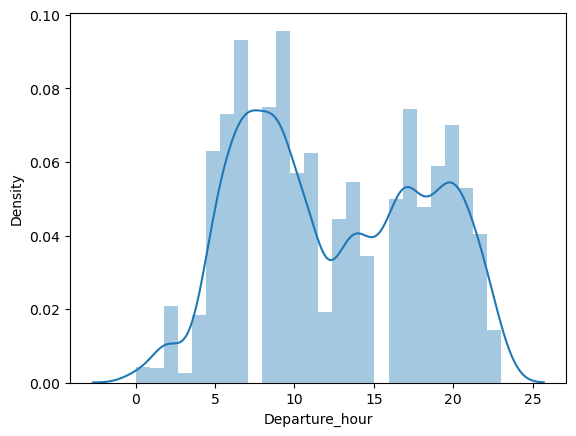

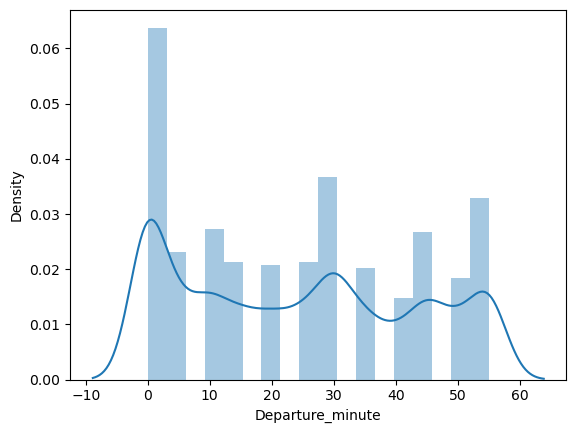

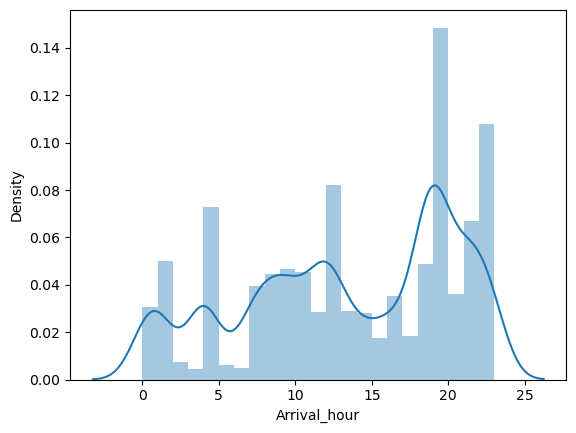

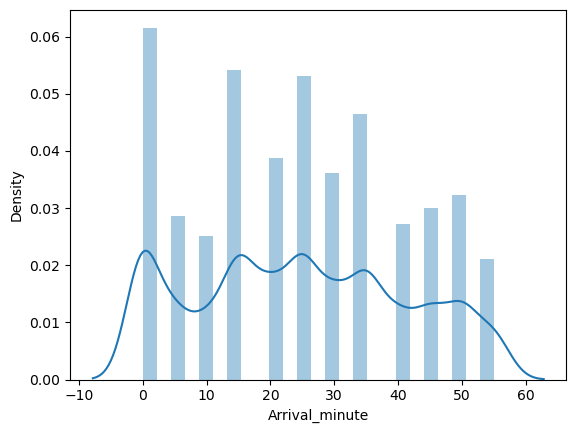

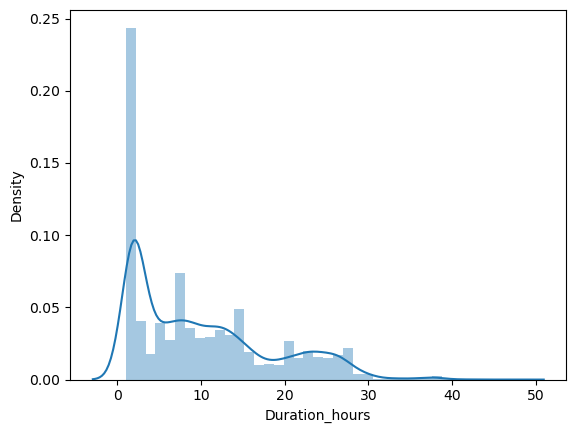

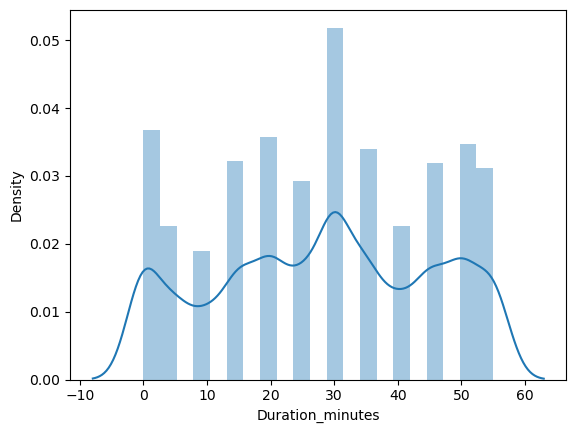

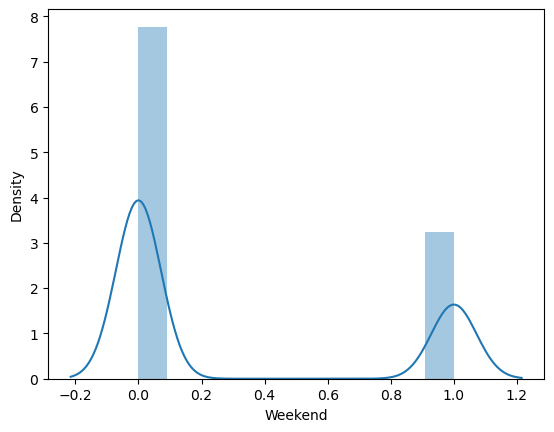

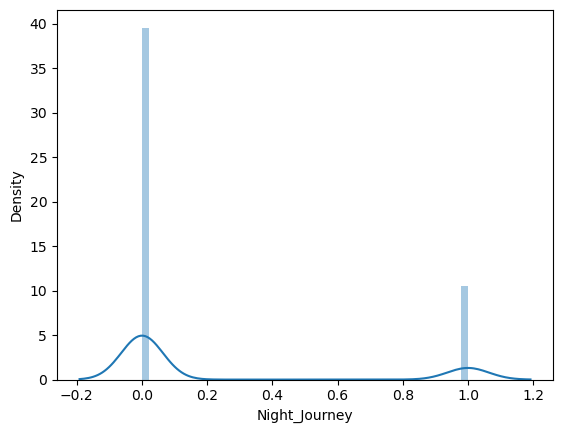

In [89]:
def distribution_plots(col):
    sns.distplot(data[col])
    plt.show()
for i in numerical_features:
    distribution_plots(i)
    

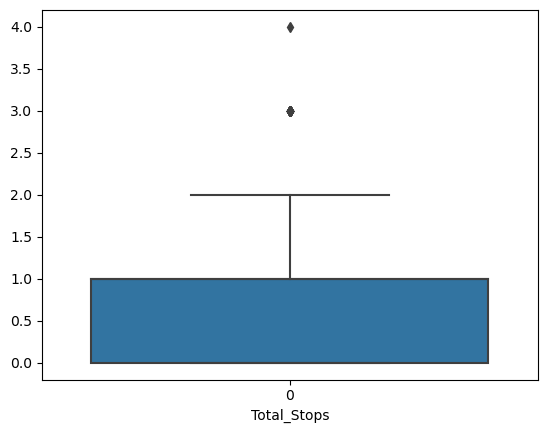

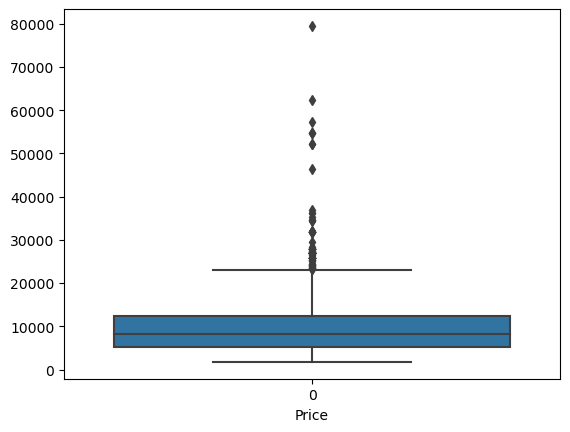

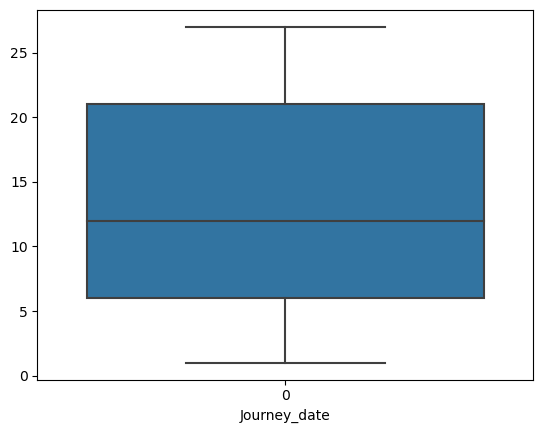

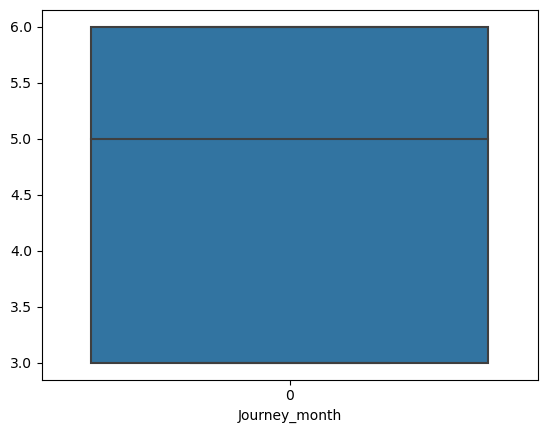

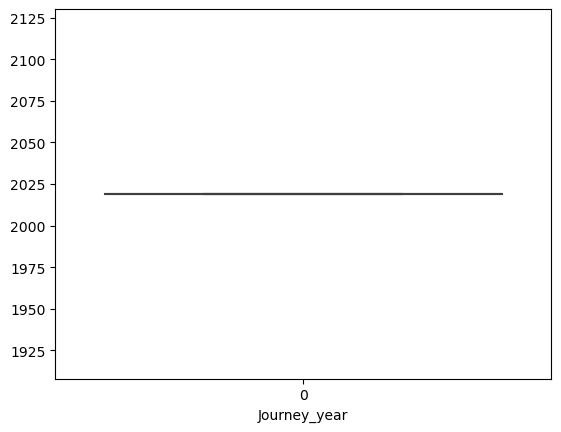

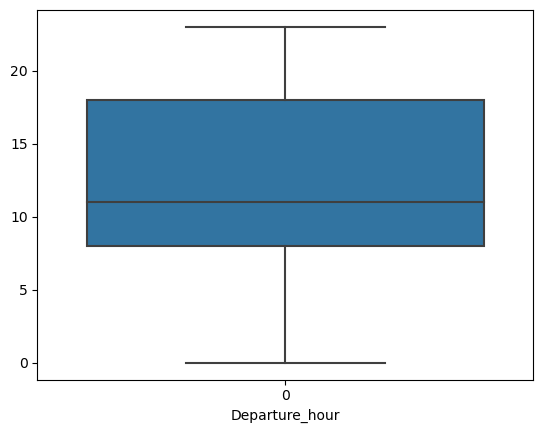

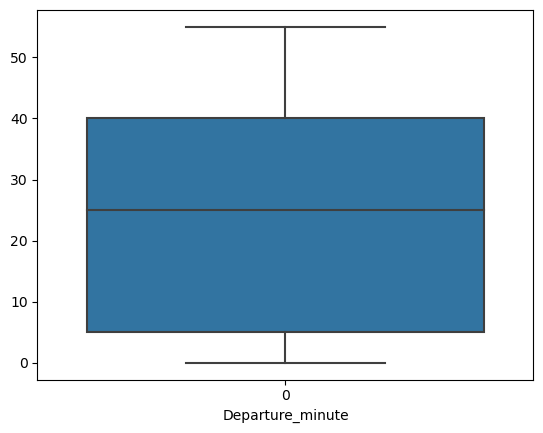

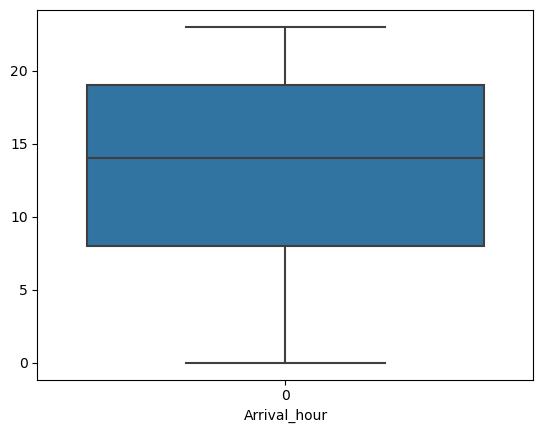

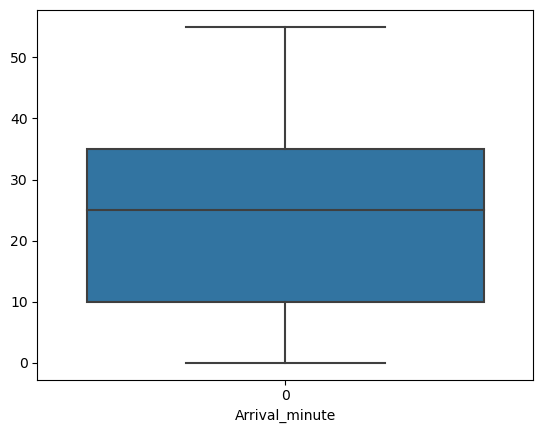

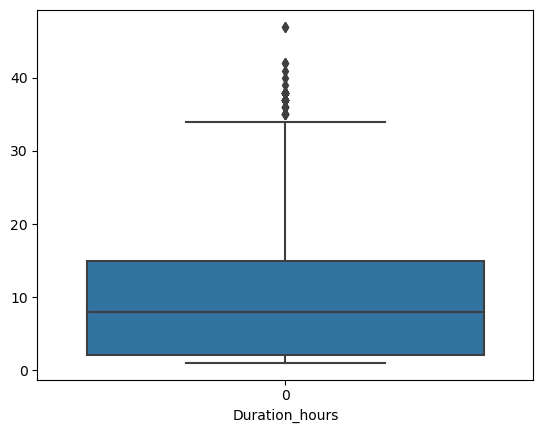

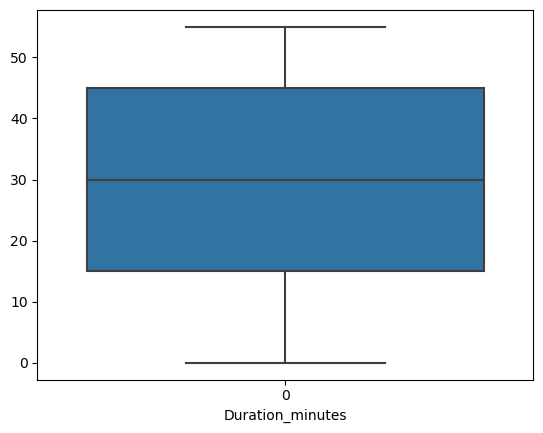

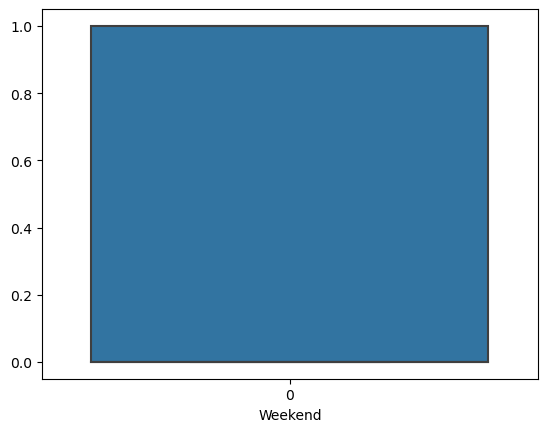

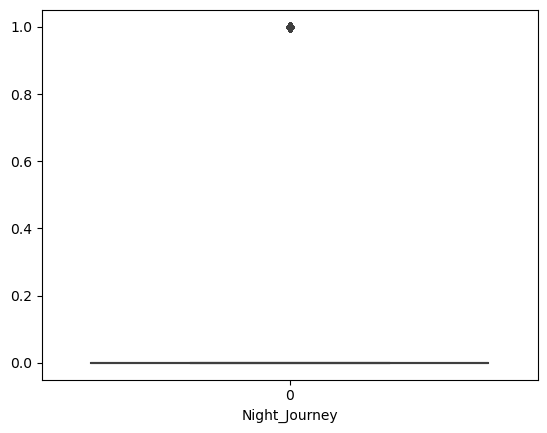

In [90]:
def Boxplots(col):
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.show()
for i in numerical_features:
    Boxplots(i)

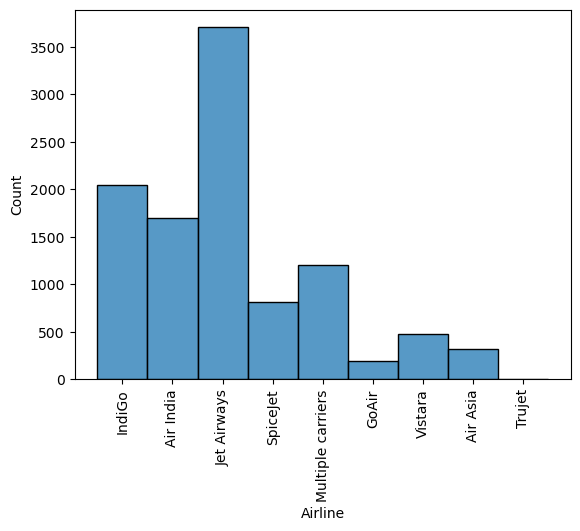

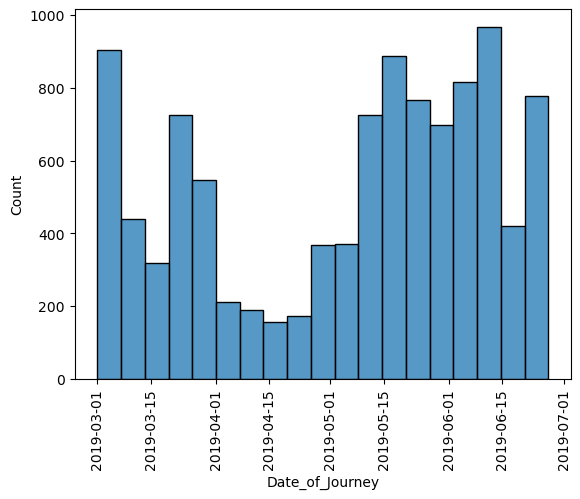

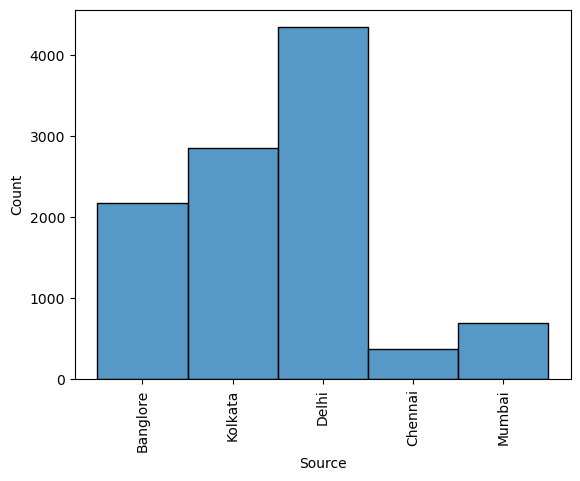

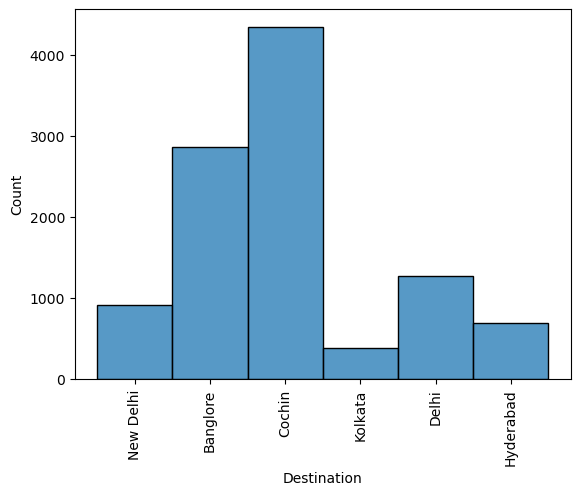

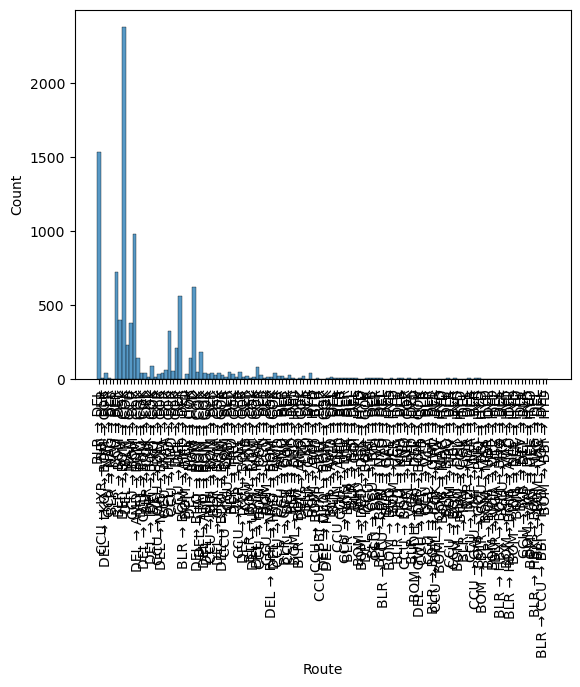

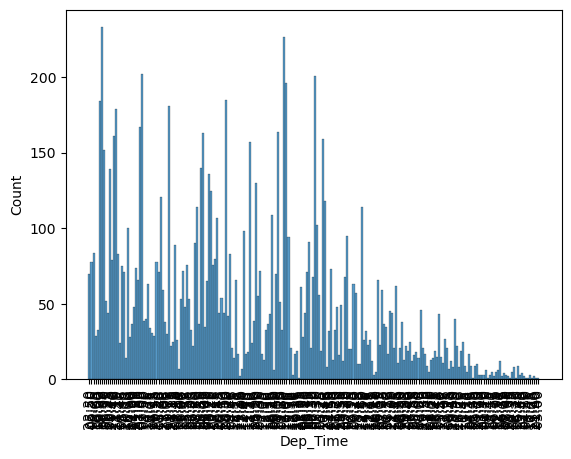

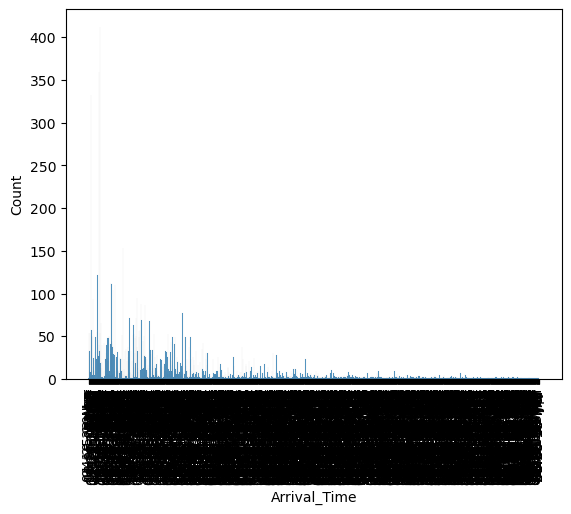

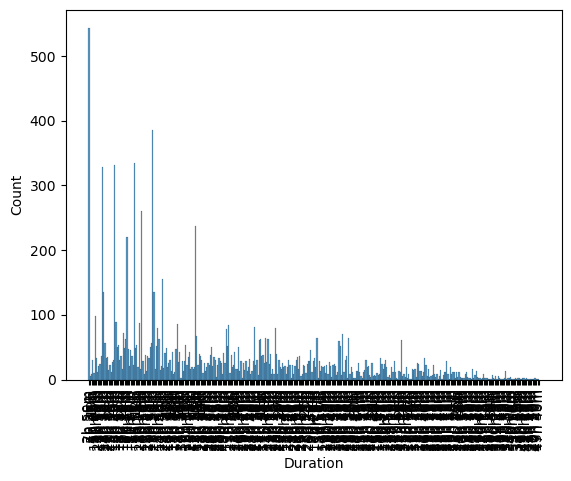

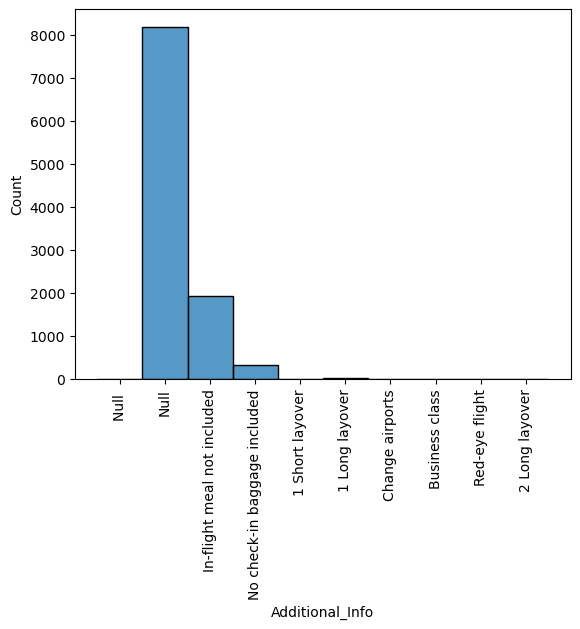

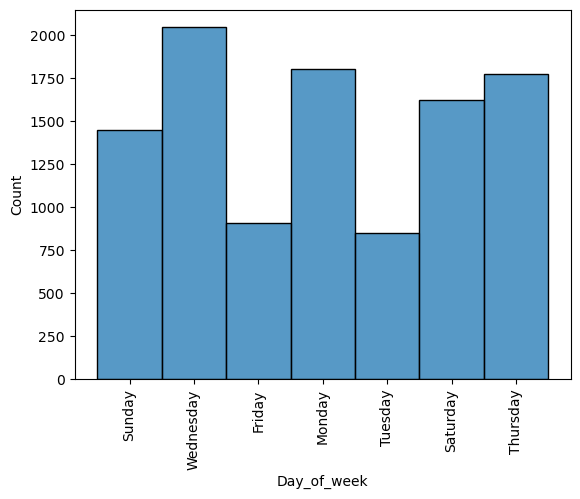

In [91]:
def histograms(col):
    sns.histplot(data[col])
    plt.xticks(rotation=90)
    plt.show()
for i in categorical_features:
    histograms(i)

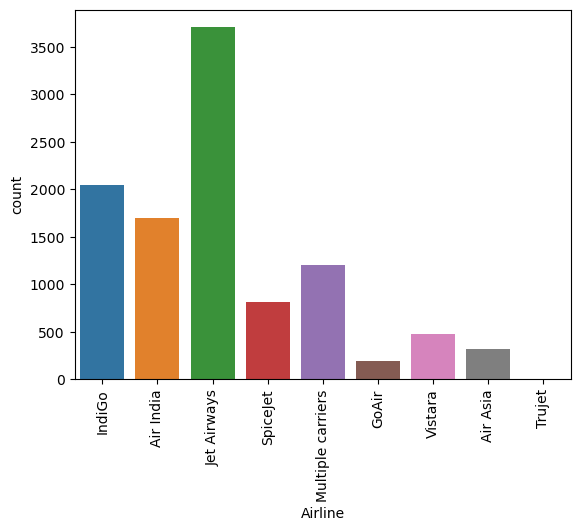

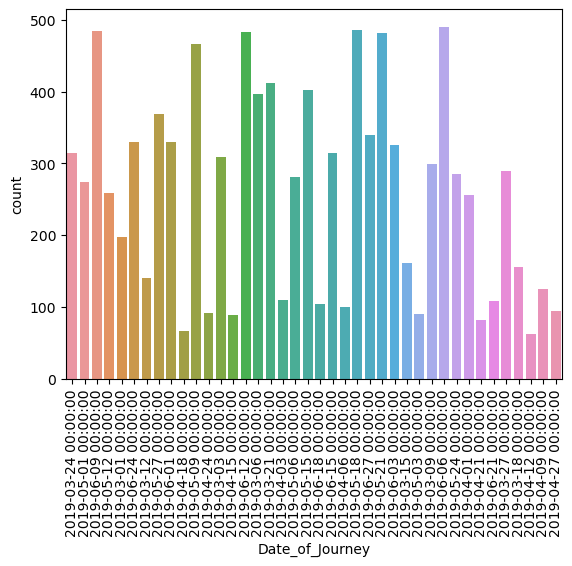

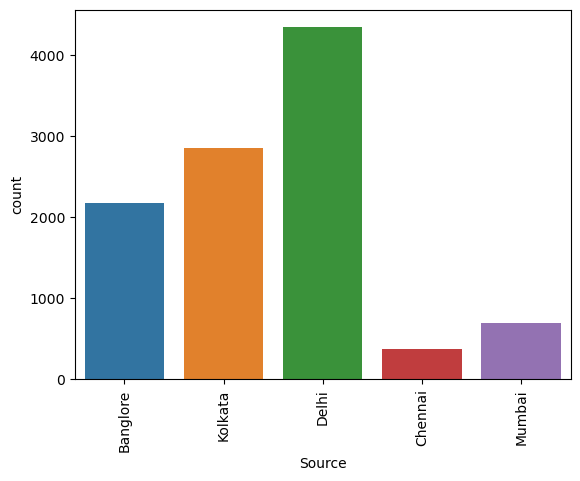

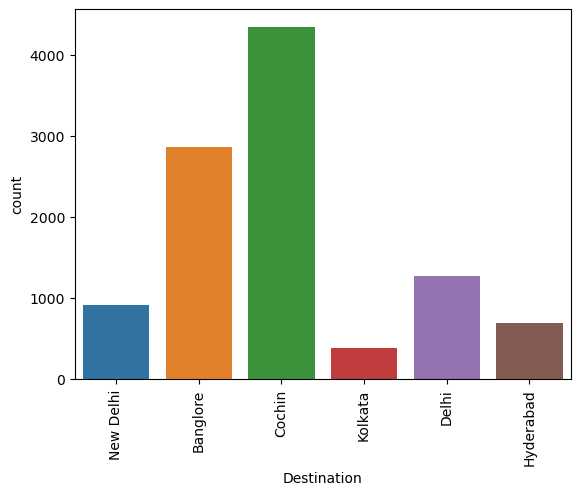

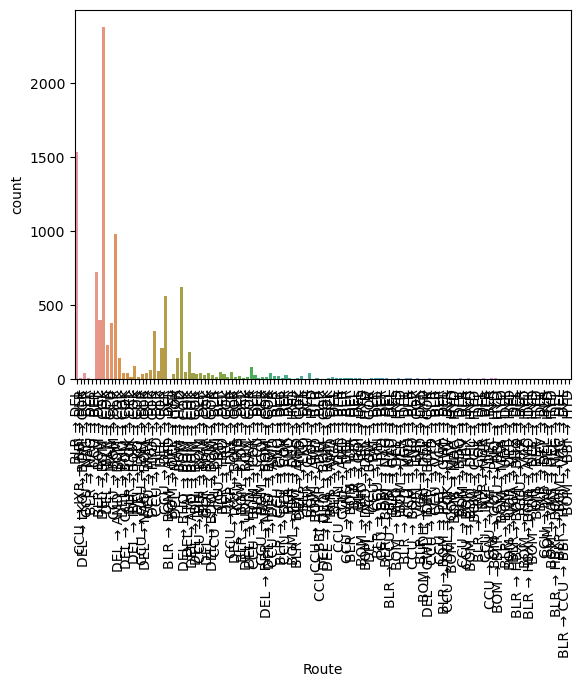

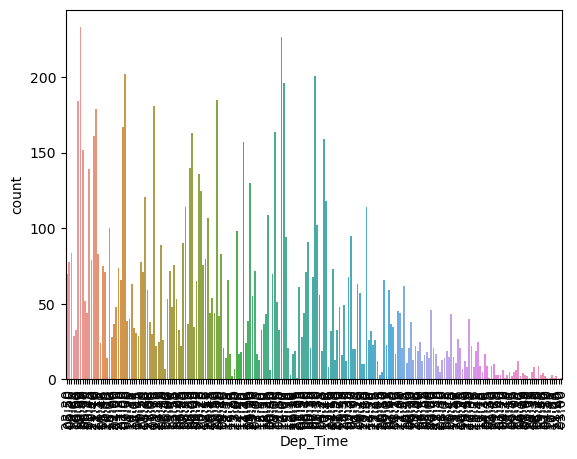

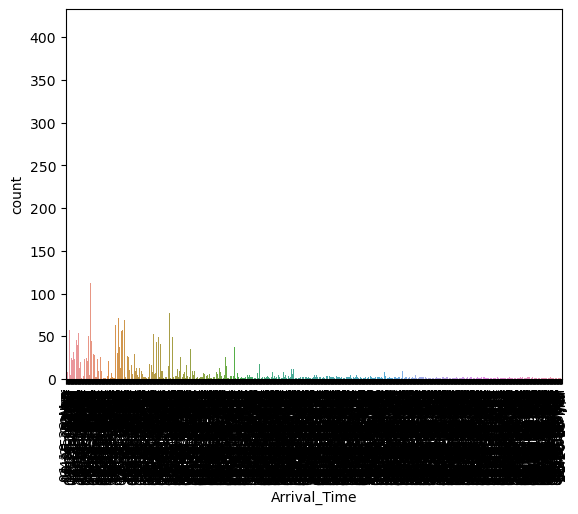

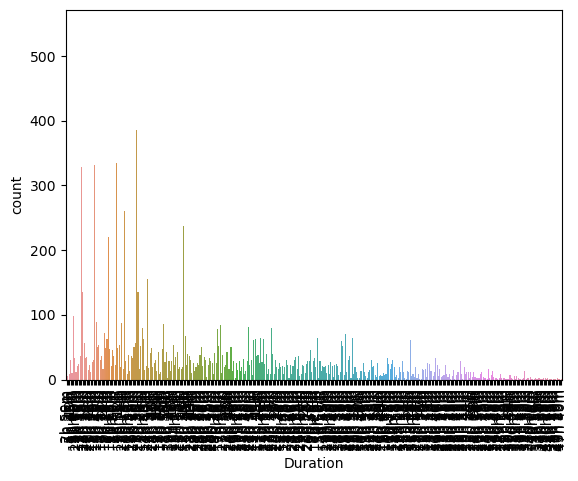

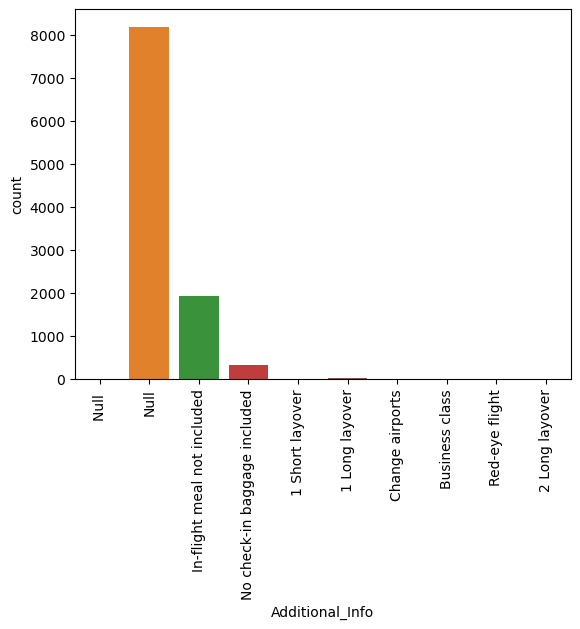

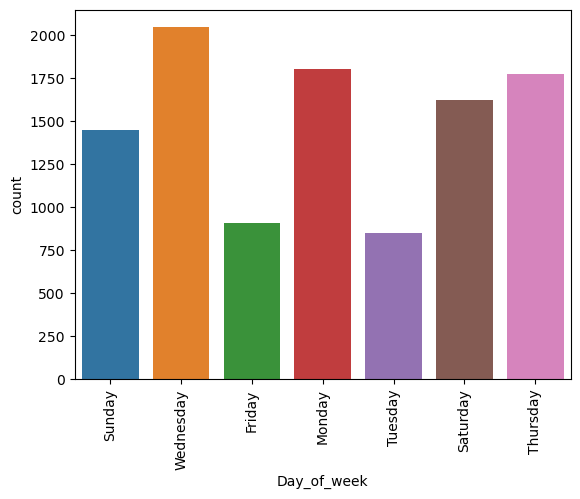

In [92]:
def countplots(col):
    sns.countplot(x=data[col])
    plt.xticks(rotation=90)
    plt.show()
for i in categorical_features:
    countplots(i)

7. **Multivariate Analysis:** Analyze relationships between multiple variables simultaneously. This involves techniques like:
   - Pair plots or scatterplot matrices to visualize pairwise relationships between numerical variables.
   - Heatmaps to visualize correlation matrices.
   - Stacked bar plots or box plots for comparing multiple variables across different categories.
   - Explore relationships between multiple variables simultaneously.
   - Use techniques such as scatterplot matrices, pair plots, or parallel coordinate plots.
   - Identify patterns, clusters, or trends in high-dimensional data.



<Figure size 1000x600 with 0 Axes>

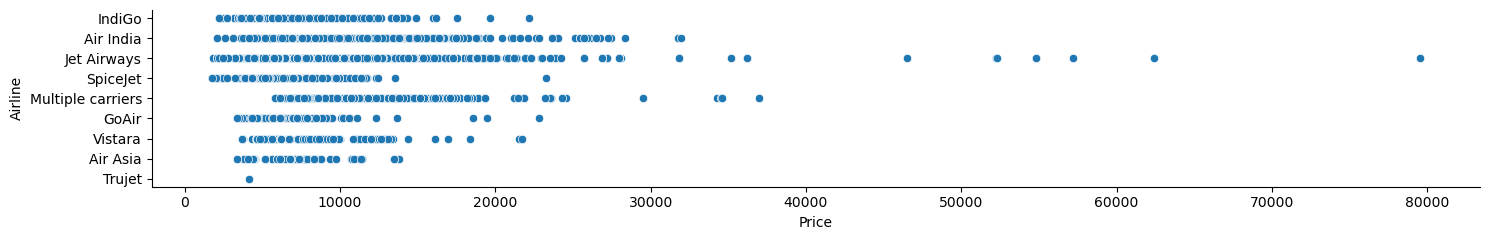

In [93]:
plt.figure(figsize=(10, 6))
sns.pairplot(data,y_vars=["Airline"],x_vars=["Price"],aspect=6)
plt.tight_layout()
plt.show()

In [94]:
airline_prices = data.groupby("Airline")["Price"].mean()
airline_prices.sort_values(ascending=False)

Airline
Jet Airways          11674.724771
Multiple carriers    10908.228288
Air India             9556.608028
Vistara               7808.596674
GoAir                 5861.056701
IndiGo                5668.469897
Air Asia              5590.260188
SpiceJet              4335.841718
Trujet                4140.000000
Name: Price, dtype: float64

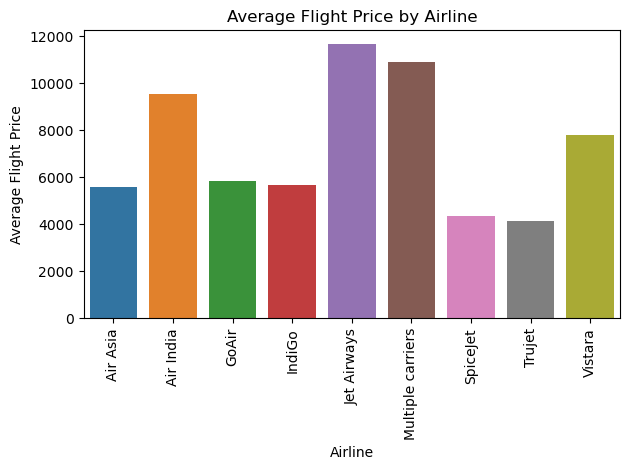

In [95]:
sns.barplot(x=airline_prices.index,y=airline_prices.values)
plt.xlabel('Airline')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Price by Airline')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

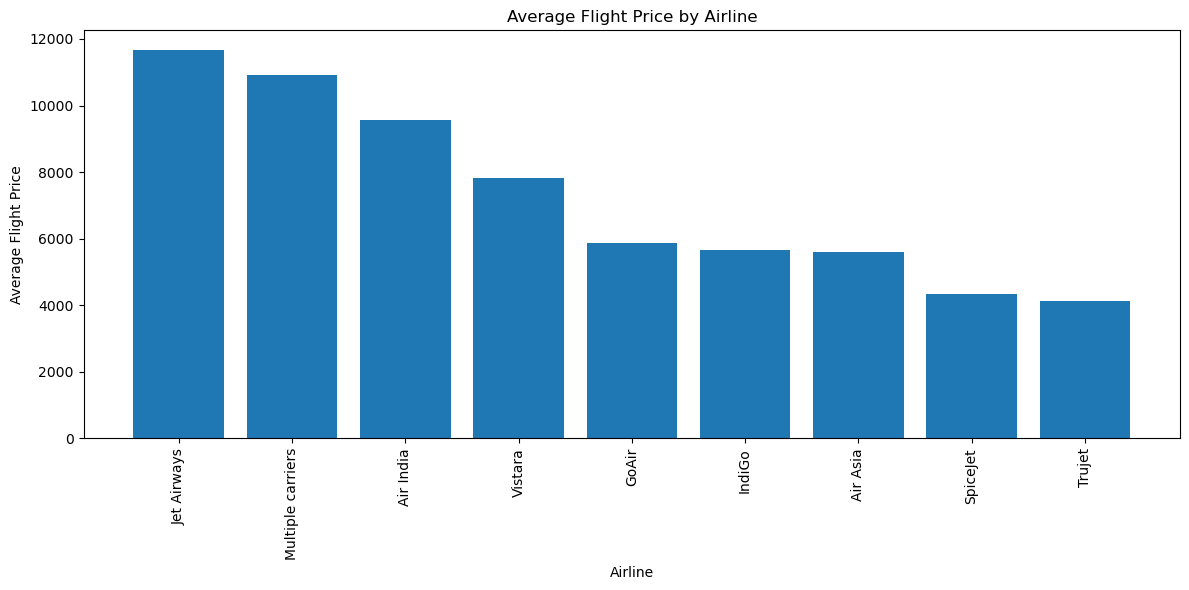

In [96]:
airline_prices = data.groupby('Airline')['Price'].mean().reset_index()

# sorting the airlines by average price in decending order
airline_prices = airline_prices.sort_values(by="Price", ascending =False)

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(airline_prices['Airline'], airline_prices['Price'])
plt.xlabel('Airline')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Price by Airline')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

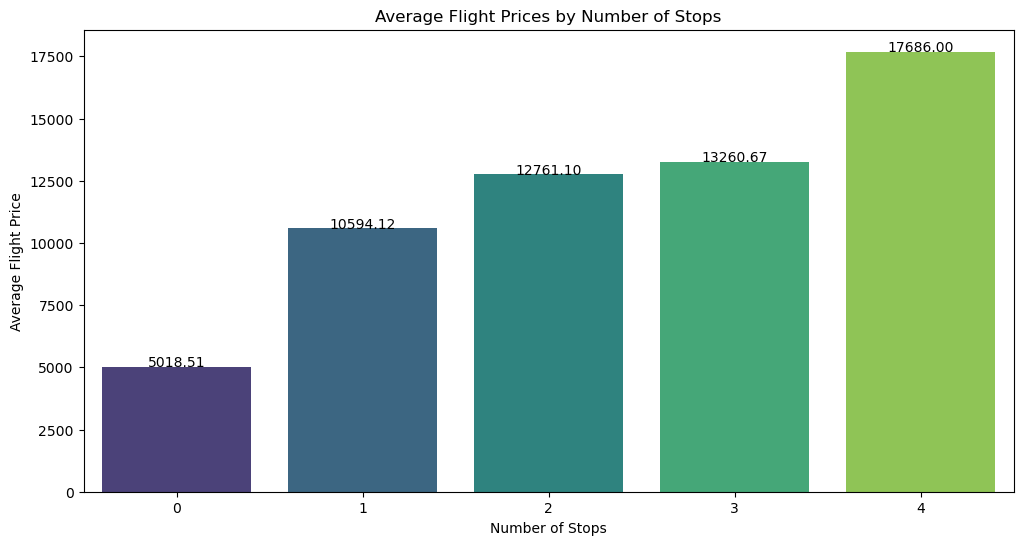

In [97]:
plt.figure(figsize=(12, 6))  # we can Adjust the figure size as needed

# Grouping the data by 'Total_Stops' and calculating the average flight price for each category
average_prices_by_stops = data.groupby('Total_Stops')['Price'].mean().reset_index()

# Sorting the categories by average price in ascending order for the bar chart
average_prices_by_stops = average_prices_by_stops.sort_values(by='Price', ascending=True)

# Creating the bar chart
ax = sns.barplot(x='Total_Stops', y='Price', data=average_prices_by_stops, palette='viridis')

# Adding exact price values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xlabel('Number of Stops')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Number of Stops')
plt.show()

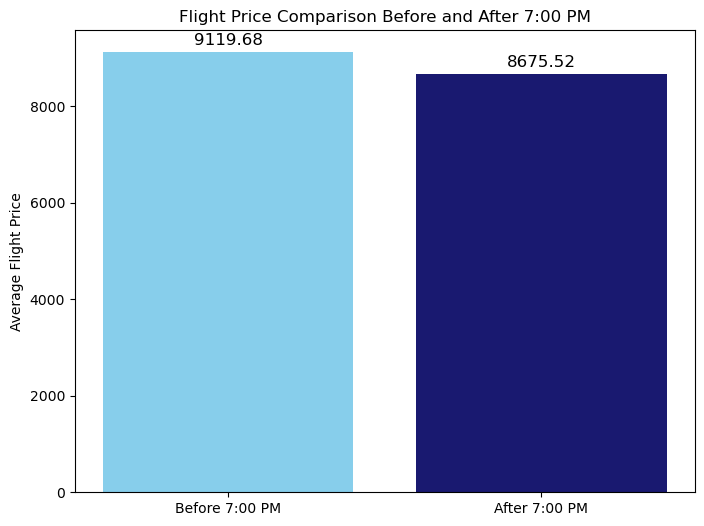

In [98]:
day_prices = data[data['Night_Journey'] == 0]['Price']
night_prices = data[data['Night_Journey'] == 1]['Price']

# Creating a bar chart to compare flight prices
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Creating the bar chart
ax = plt.bar(['Before 7:00 PM', 'After 7:00 PM'], [day_prices.mean(), night_prices.mean()], color=['skyblue', 'midnightblue'])
plt.ylabel('Average Flight Price')
plt.title('Flight Price Comparison Before and After 7:00 PM')

# Adding exact price values on top of each bar
for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.show()

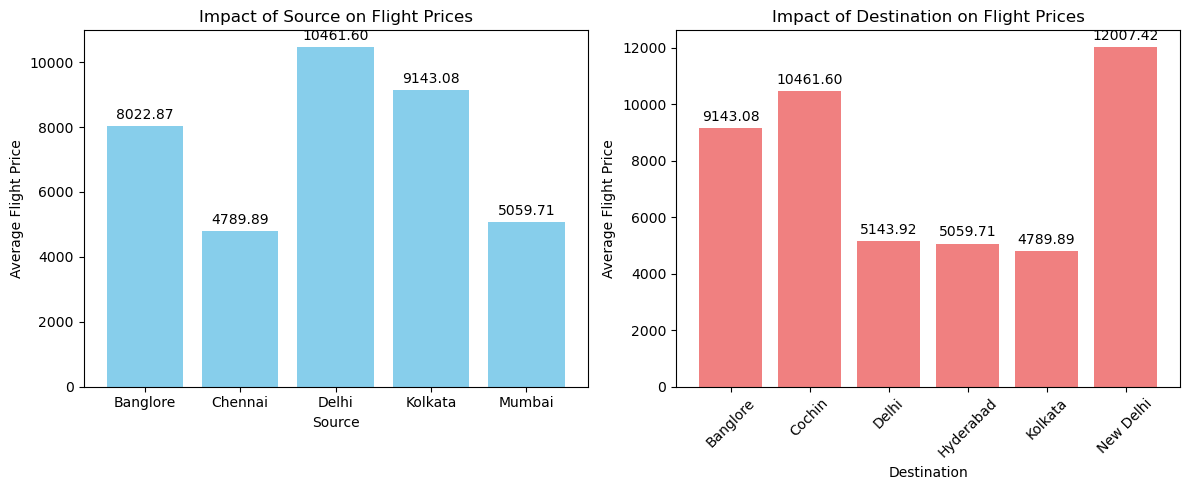

In [99]:
source_prices = data.groupby('Source')['Price'].mean().reset_index()

# Calculate the average flight price for each destination location
destination_prices = data.groupby('Destination')['Price'].mean().reset_index()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the impact of 'Source' on flight prices
ax1.bar(source_prices['Source'], source_prices['Price'], color='skyblue')
ax1.set_xlabel('Source')
ax1.set_ylabel('Average Flight Price')
ax1.set_title('Impact of Source on Flight Prices')

# Plot the impact of 'Destination' on flight prices
ax2.bar(destination_prices['Destination'], destination_prices['Price'], color='lightcoral')
ax2.set_xlabel('Destination')
ax2.set_ylabel('Average Flight Price')
ax2.set_title('Impact of Destination on Flight Prices')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Annotate each bar with the exact price value
for bar1, price1 in zip(ax1.patches, source_prices['Price']):
    ax1.annotate(f'{price1:.2f}', xy=(bar1.get_x() + bar1.get_width() / 2, bar1.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for bar2, price2 in zip(ax2.patches, destination_prices['Price']):
    ax2.annotate(f'{price2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, bar2.get_height()),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Adjust layout spacing
plt.tight_layout()

# Display the two bar charts side by side
plt.show()

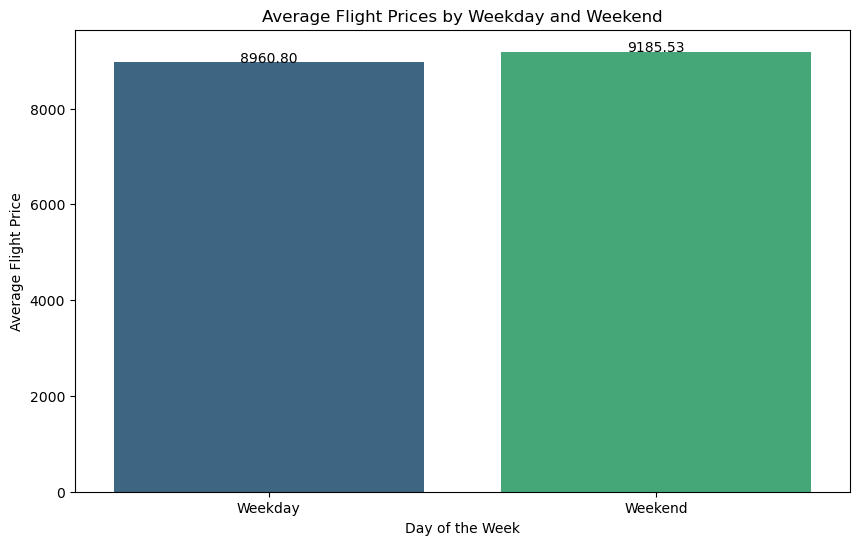

In [100]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Grouping the data by 'Weekend' and calculating the average flight price for each category
average_prices_by_weekend = data.groupby('Weekend')['Price'].mean().reset_index()

# Creating the bar chart
ax = sns.barplot(x='Weekend', y='Price', data=average_prices_by_weekend, palette='viridis')

# Adding exact price values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.xticks([0, 1], ['Weekday', 'Weekend'])  # Set the x-axis labels
plt.xlabel('Day of the Week')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Weekday and Weekend')
plt.show()

In [101]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey,Day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,2019,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,2019,5,50,13,15,7,25,0,0,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,Null,...,2019,9,25,4,25,19,0,1,0,Sunday


In [102]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey,Day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,2019,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,2019,5,50,13,15,7,25,0,0,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,Null,...,2019,9,25,4,25,19,0,1,0,Sunday


In [103]:
counts = data.groupby(["Source","Airline"]).size()
pd.DataFrame(counts)

0
Source   Airline                
Banglore Air Asia             89
         Air India           329
         GoAir                93
         IndiGo              513
         Jet Airways         791
         SpiceJet            178
         Vistara             186
Chennai  Air India            25
         IndiGo              184
         SpiceJet            128
         Vistara              44
Delhi    Air Asia             80
         Air India           703
         GoAir                76
         IndiGo              705
         Jet Airways        1440
         Multiple carriers  1209
         SpiceJet             87
         Vistara              45
Kolkata  Air Asia            150
         Air India           501
         GoAir                25
         IndiGo              445
         Jet Airways        1256
         SpiceJet            300
         Vistara             183
Mumbai   Air India           136
         IndiGo              196
         Jet Airways         219
         SpiceJet            122
         Trujet                1
         Vistara              23

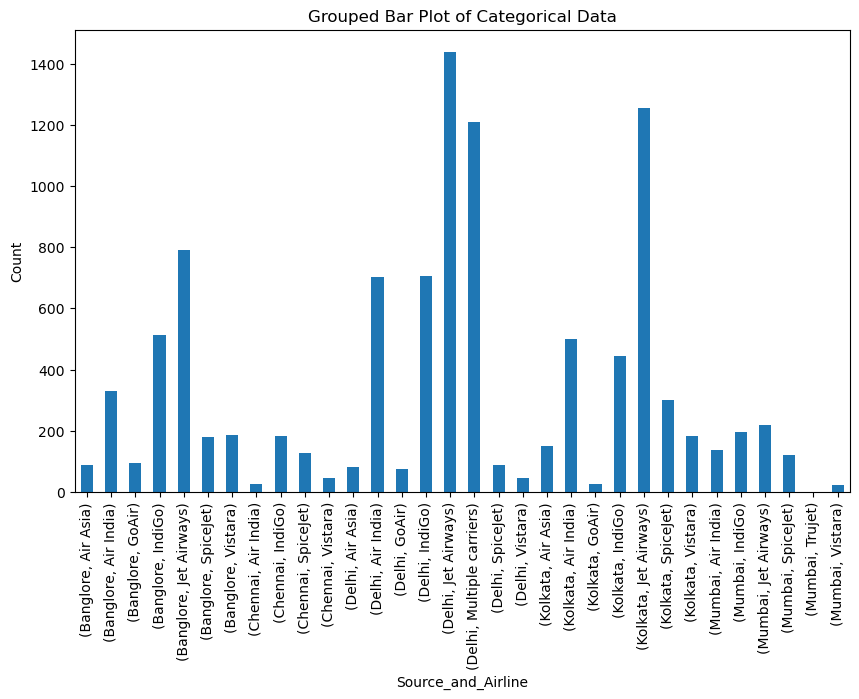

In [104]:
plt.figure(figsize=(10, 6))
counts = data.groupby(["Source","Airline"]).size()
counts.plot(kind='bar', stacked=True)
plt.title('Grouped Bar Plot of Categorical Data')
plt.xlabel('Source_and_Airline')
plt.ylabel('Count')
plt.show()

In [105]:
counts = data.groupby(["Airline","Destination"]).size()
pd.DataFrame(counts)

0
Airline           Destination      
Air Asia          Banglore      150
                  Cochin         80
                  Delhi          71
                  New Delhi      18
Air India         Banglore      501
                  Cochin        703
                  Delhi         120
                  Hyderabad     136
                  Kolkata        25
                  New Delhi     209
GoAir             Banglore       25
                  Cochin         76
                  Delhi          69
                  New Delhi      24
IndiGo            Banglore      445
                  Cochin        705
                  Delhi         366
                  Hyderabad     196
                  Kolkata       184
                  New Delhi     147
Jet Airways       Banglore     1256
                  Cochin       1440
                  Delhi         370
                  Hyderabad     219
                  New Delhi     421
Multiple carriers Cochin       1209
SpiceJet          Banglore      300
                  Cochin         87
                  Delhi         137
                  Hyderabad     122
                  Kolkata       128
                  New Delhi      41
Trujet            Hyderabad       1
Vistara           Banglore      183
                  Cochin         45
                  Delhi         132
                  Hyderabad      23
                  Kolkata        44
                  New Delhi      54

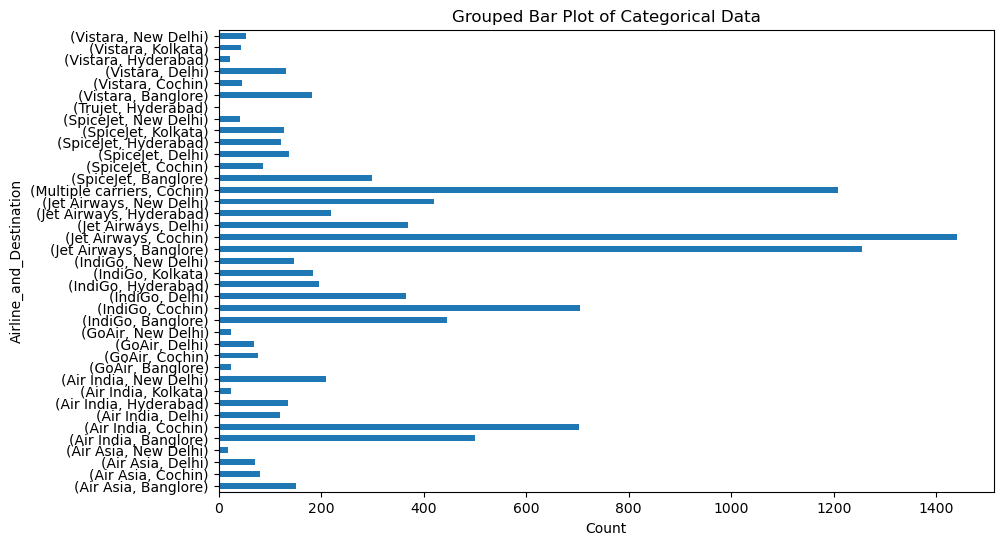

In [106]:
plt.figure(figsize=(10, 6))
counts = data.groupby(["Airline","Destination"]).size()
counts.plot(kind='barh', stacked=True)
plt.title('Grouped Bar Plot of Categorical Data')
plt.ylabel('Airline_and_Destination')
plt.xlabel('Count')
plt.show()

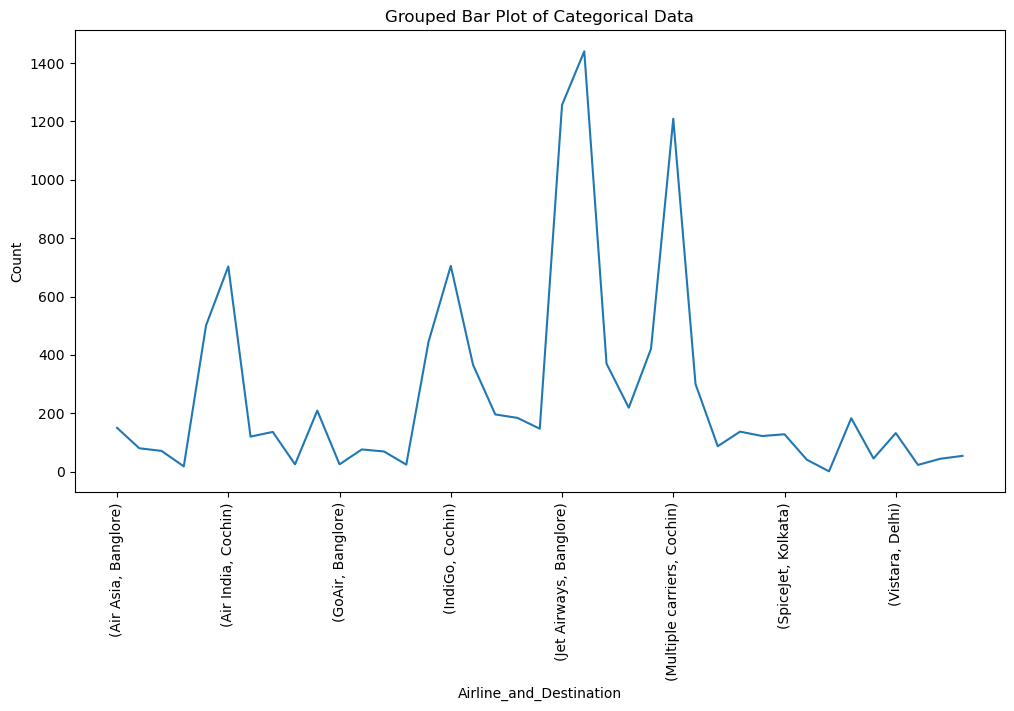

In [107]:
plt.figure(figsize=(12, 6))
counts = data.groupby(["Airline","Destination"]).size()
counts.plot()
plt.title('Grouped Bar Plot of Categorical Data')
plt.xlabel('Airline_and_Destination')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

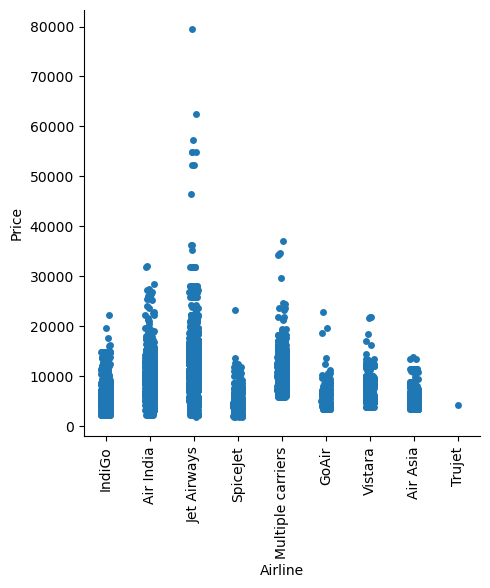

In [108]:
sns.catplot(data=data,y="Price",x="Airline")
plt.xticks(rotation=90)
plt.show()

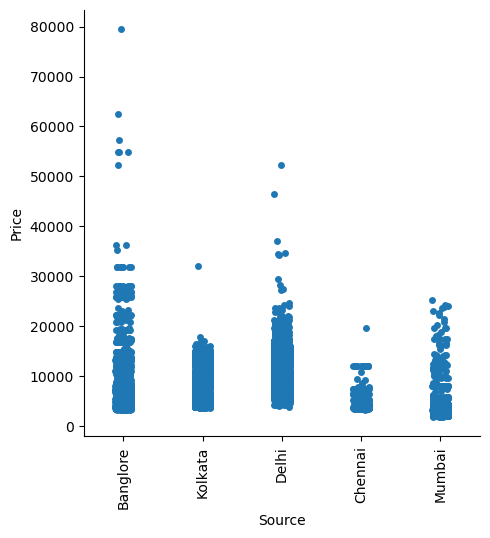

In [109]:
sns.catplot(data=data,y="Price",x="Source")
plt.xticks(rotation=90)
plt.show()

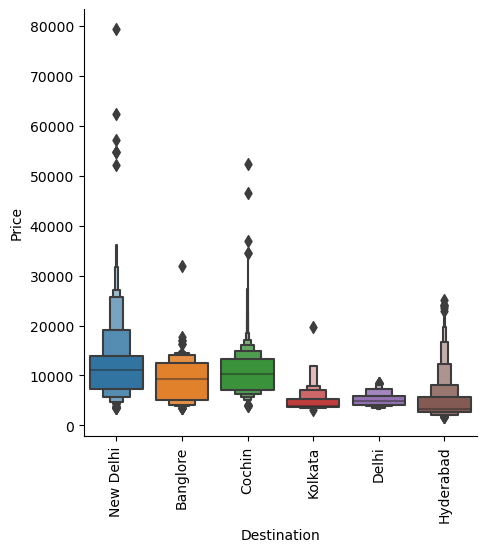

In [110]:
sns.catplot(data=data,y="Price",x="Destination",kind="boxen")
plt.xticks(rotation=90)
plt.show()

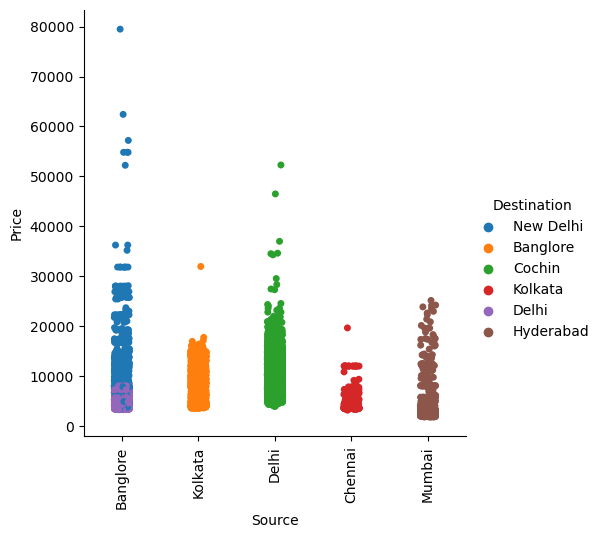

In [111]:
sns.catplot(data=data,y="Price",x="Source",hue="Destination")
plt.xticks(rotation=90)
plt.show()

8. **Feature Engineering:** Create new features or transform existing ones to improve model performance. This may involve:
   - Creating dummy variables for categorical variables.
   - Transforming numerical variables (e.g., log transformation, scaling).
   - Extracting features from date-time variables.
   - Create new features from existing ones based on domain knowledge or insights gained during exploration.
   - Transform variables (e.g., log transformation, scaling) to meet modeling assumptions or improve performance.
   - Encode categorical variables using techniques such as one-hot encoding or label encoding.


In [112]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_year,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Weekend,Night_Journey,Day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,2019,22,20,1,10,2,50,1,1,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,2019,5,50,13,15,7,25,0,0,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,Null,...,2019,9,25,4,25,19,0,1,0,Sunday
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,...,2019,18,5,23,30,5,25,1,0,Sunday
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,...,2019,16,50,21,35,4,45,0,0,Friday


One-Hot Encoding: If the names represent distinct categories and there is no inherent order among them, you can use one-hot encoding. Each unique name will be transformed into a binary feature (0 or 1). This will create nine new binary features.

Label Encoding: If there is a natural ordinal relationship among the names, you can use label encoding. Each unique name will be encoded with an integer value. However, be cautious when using label encoding if there is no inherent order among the names, as it may introduce unintended ordinality.

In [113]:
Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True, dtype=int)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [114]:
Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True, dtype=int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [115]:
Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True, dtype=int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [116]:
data.shape

(10462, 23)

In [117]:
data = pd.concat([data,Airline,Source,Destination],axis=1)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,Null,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,Null,...,0,0,1,0,0,1,0,0,0,0


In [118]:
data.shape

(10462, 40)

In [119]:
data.drop(['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Additional_Info',"Journey_year"], axis=1, inplace=True)

In [120]:
data.head(3)

,Total_Stops,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0


In [121]:
data.dtypes

Total_Stops                   int64
Price                         int64
Journey_date                  int32
Journey_month                 int32
Departure_hour                int32
Departure_minute              int32
Arrival_hour                  int32
Arrival_minute                int32
Duration_hours                int32
Duration_minutes              int32
Weekend                       int32
Night_Journey                 int32
Day_of_week                  object
Airline_Air India             int32
Airline_GoAir                 int32
Airline_IndiGo                int32
Airline_Jet Airways           int32
Airline_Multiple carriers     int32
Airline_SpiceJet              int32
Airline_Trujet                int32
Airline_Vistara               int32
Source_Chennai                int32
Source_Delhi                  int32
Source_Kolkata                int32
Source_Mumbai                 int32
Destination_Cochin            int32
Destination_Delhi             int32
Destination_Hyderabad       

In [122]:
data["Day_of_week"]

0           Sunday
1        Wednesday
2           Sunday
3           Sunday
4           Friday
           ...    
10678      Tuesday
10679     Saturday
10680     Saturday
10681       Friday
10682     Thursday
Name: Day_of_week, Length: 10462, dtype: object

In [123]:
data['Day_of_week'] = data['Day_of_week'].replace({'Monday':1, 'Tuesday':2, 'Wednesday': 3,
                                               'Thursday': 4,'Friday':5,'Saturday':6,'Sunday':7})
data['Day_of_week'] = data.Day_of_week.astype(int)

In [124]:
data.dtypes

Total_Stops                  int64
Price                        int64
Journey_date                 int32
Journey_month                int32
Departure_hour               int32
Departure_minute             int32
Arrival_hour                 int32
Arrival_minute               int32
Duration_hours               int32
Duration_minutes             int32
Weekend                      int32
Night_Journey                int32
Day_of_week                  int32
Airline_Air India            int32
Airline_GoAir                int32
Airline_IndiGo               int32
Airline_Jet Airways          int32
Airline_Multiple carriers    int32
Airline_SpiceJet             int32
Airline_Trujet               int32
Airline_Vistara              int32
Source_Chennai               int32
Source_Delhi                 int32
Source_Kolkata               int32
Source_Mumbai                int32
Destination_Cochin           int32
Destination_Delhi            int32
Destination_Hyderabad        int32
Destination_Kolkata 

In [125]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Departure_hour', 'Departure_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duration_minutes', 'Weekend', 'Night_Journey',
       'Day_of_week', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [126]:
data.shape

(10462, 30)

10. **Correlation Analysis:**
   - Compute pairwise correlations between numerical variables.
   - Visualize correlations using heatmaps to identify relationships and multicollinearity.
   - Analyze correlation coefficients to understand the strength and direction of relationships.


In [127]:
correlation_matrix = data.corr()
correlation_matrix

,Total_Stops,Price,Journey_date,Journey_month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.602013,-0.018937,0.039003,-0.067523,-0.002695,0.051476,-0.107099,0.730297,-0.150297,...,-0.118090,-0.236125,0.474480,0.050105,-0.260668,0.474480,-0.450456,-0.260668,-0.236125,-0.000170
Price,0.602013,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163,0.504329,-0.131709,...,-0.057826,-0.178107,0.261483,0.015424,-0.229179,0.261483,-0.311385,-0.229179,-0.178107,0.199411
Journey_date,-0.018937,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086,-0.029434,-0.009219,...,-0.014327,0.007745,0.095882,-0.057415,-0.012759,0.095882,0.004676,-0.012759,0.007745,-0.075976
Journey_month,0.039003,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261,0.006327,-0.046281,...,-0.017027,0.006898,0.130845,0.091726,-0.038187,0.130845,0.093871,-0.038187,0.006898,-0.452364
Departure_hour,-0.067523,0.005155,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989,-0.000613,-0.018859,...,0.024533,-0.014639,-0.125286,0.160484,-0.016968,-0.125286,0.010428,-0.016968,-0.014639,-0.022008
Departure_minute,-0.002695,-0.024155,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353,-0.022071,0.089227,...,-0.079413,0.067710,-0.087885,-0.023347,0.038091,-0.087885,0.003314,0.038091,0.067710,0.107839
Arrival_hour,0.051476,0.031023,-0.002448,0.001423,-0.003827,0.046564,1.000000,-0.152036,0.065612,-0.116693,...,0.068275,-0.016056,-0.001259,0.054661,-0.035406,-0.001259,-0.033334,-0.035406,-0.016056,-0.003671
Arrival_minute,-0.107099,-0.086163,-0.015086,-0.099261,0.072989,-0.021353,-0.152036,1.000000,-0.075841,0.156118,...,0.069816,-0.031050,-0.210108,0.117536,0.081318,-0.210108,0.095356,0.081318,-0.031050,0.019837
Duration_hours,0.730297,0.504329,-0.029434,0.006327,-0.000613,-0.022071,0.065612,-0.075841,1.000000,-0.134062,...,-0.016008,-0.186272,0.280521,0.140747,-0.232056,0.280521,-0.345553,-0.232056,-0.186272,0.015785
Duration_minutes,-0.150297,-0.131709,-0.009219,-0.046281,-0.018859,0.089227,-0.116693,0.156118,-0.134062,1.000000,...,0.044104,-0.098939,-0.163484,0.018172,-0.017308,-0.163484,0.224233,-0.017308,-0.098939,0.078642


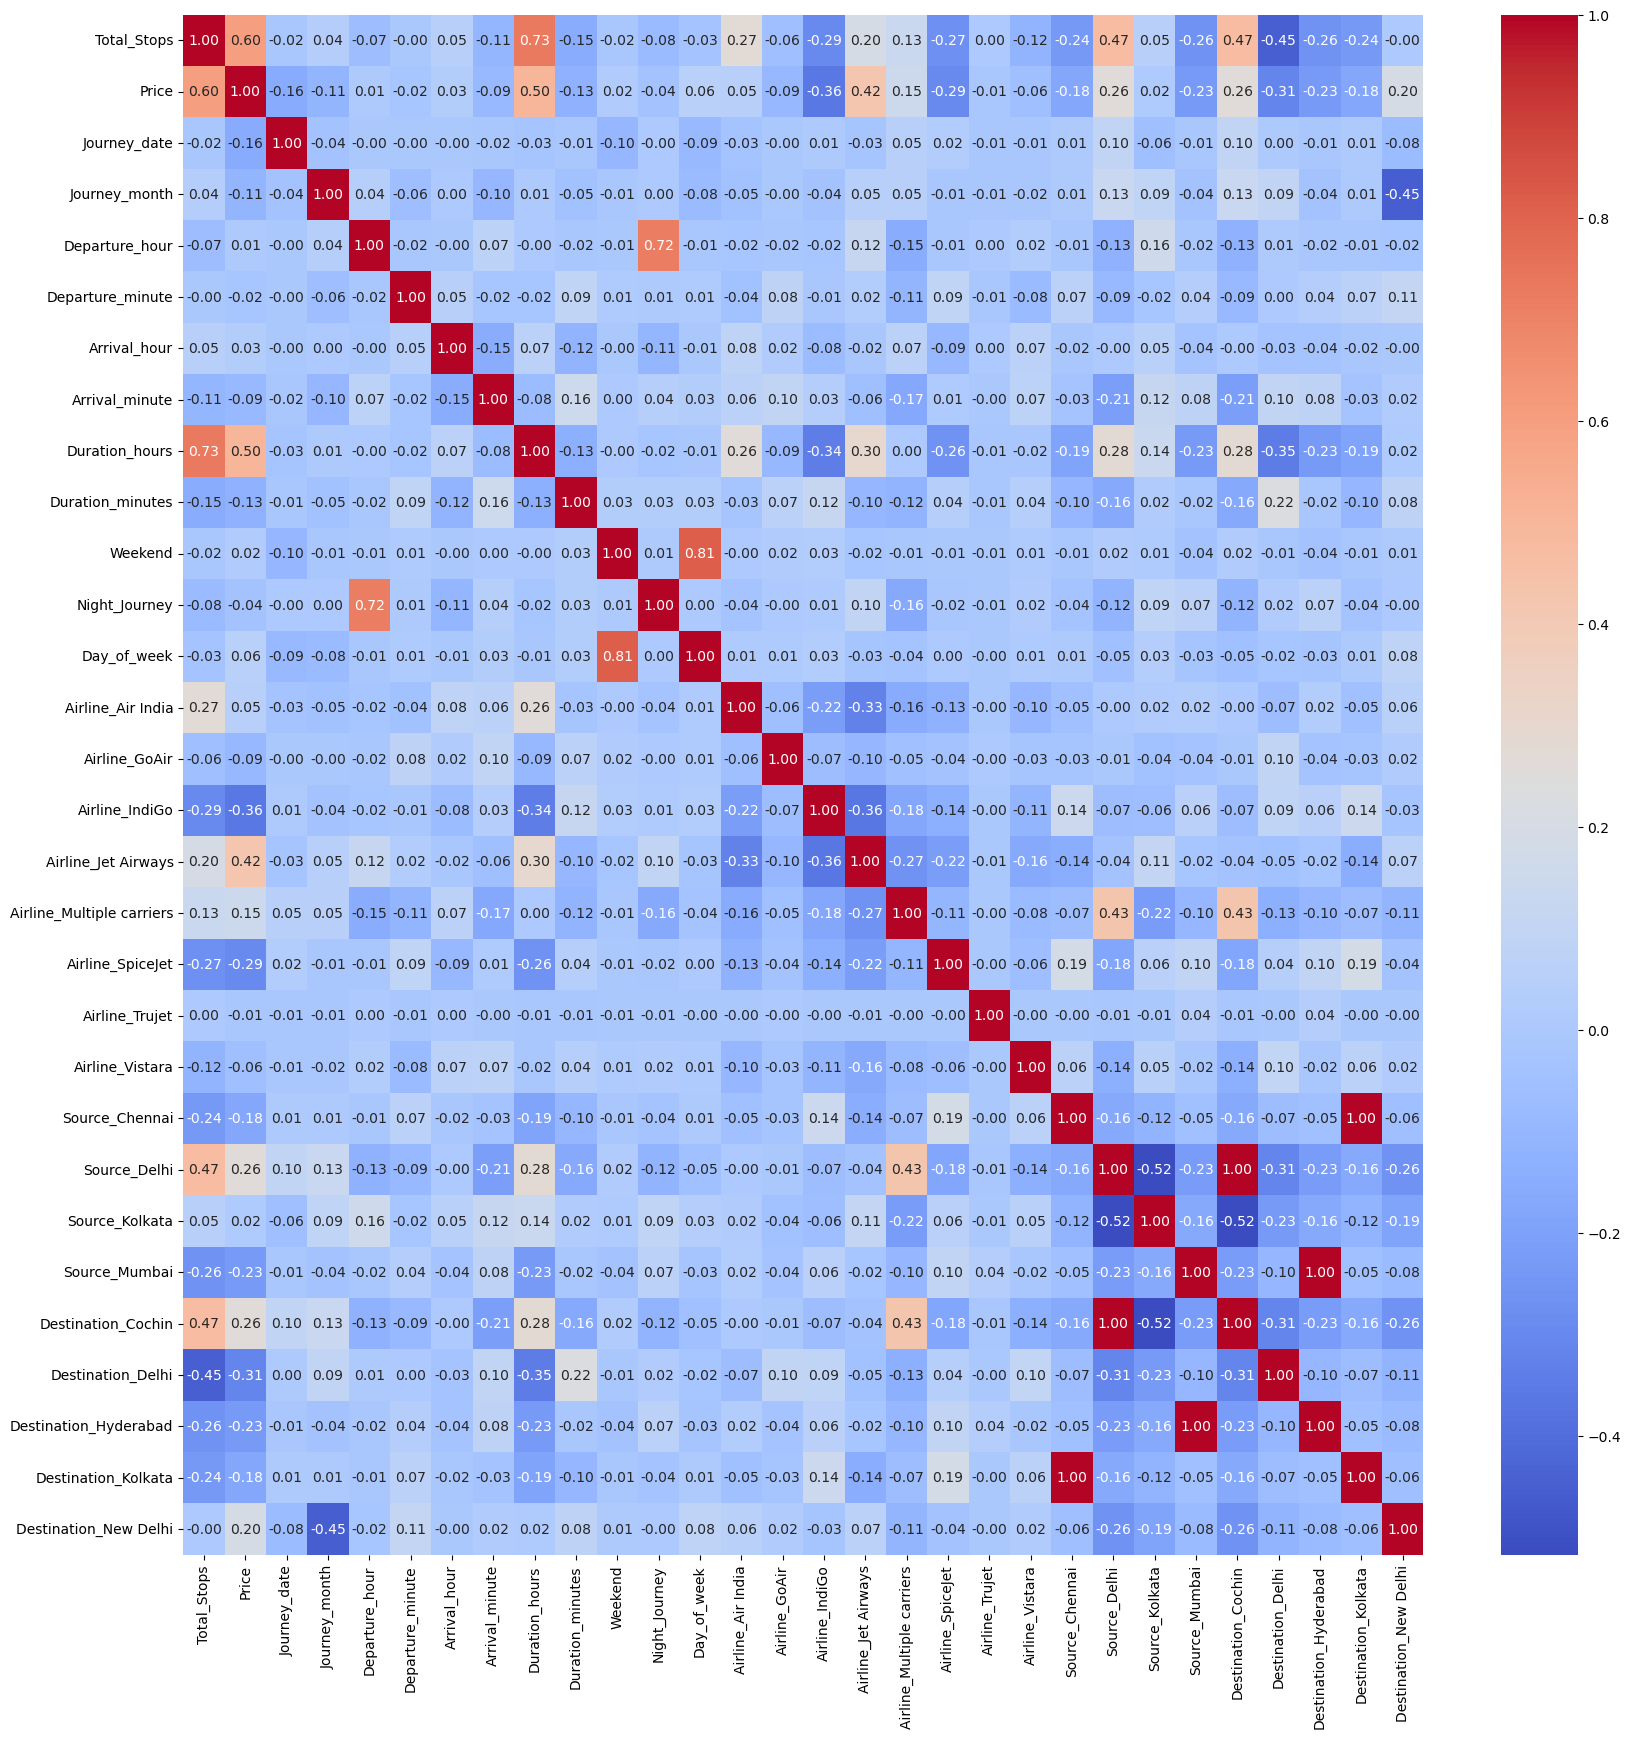

In [128]:
plt.figure(figsize = (20,20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

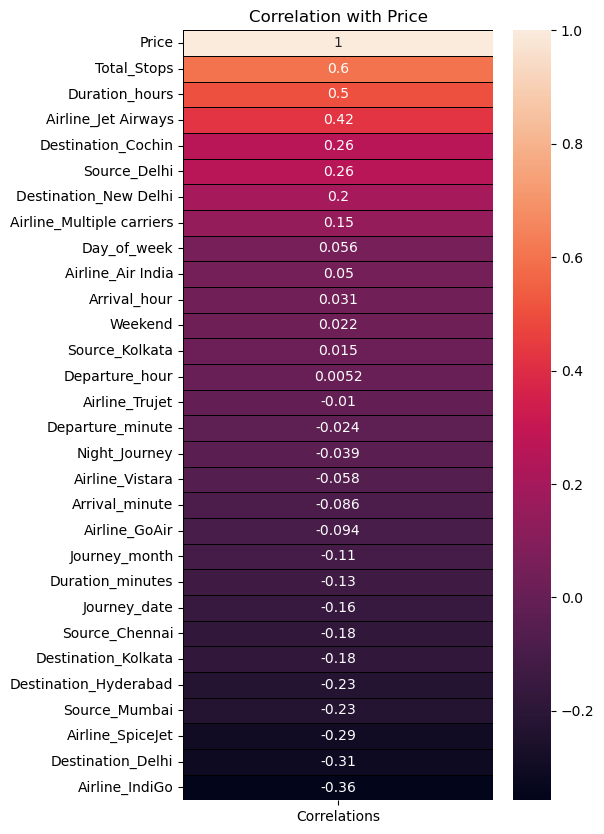

In [129]:
corr = data.corrwith(data['Price']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,10))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with Price');

If you have features with high correlation values (more than 0.7) and some are even perfectly correlated (correlation value of 1.0), it's essential to address multicollinearity to build a robust model. Here are some strategies you can consider

**Regularization Techniques:** Regularization methods like Ridge regression and Lasso regression can help mitigate the effects of multicollinearity by penalizing large coefficients. Ridge regression adds a penalty term to the cost function based on the square of the magnitude of coefficients, while Lasso regression uses the absolute value of coefficients. By tuning the regularization parameter, you can control the extent to which multicollinearity is addressed.

**Principal Component Analysis (PCA):** PCA is a dimensionality reduction technique that can be used to decorrelate features and create orthogonal components (principal components) that capture most of the variability in the data. By transforming the original features into a new set of uncorrelated features, you can reduce multicollinearity while retaining most of the information in the data.

**Feature Selection:** Instead of using all features in the model, consider performing feature selection to choose a subset of features that are most relevant for predicting the target variable. Techniques like recursive feature elimination (RFE) or forward/backward selection can help identify the most important features while reducing multicollinearity.

**Tree-Based Models:** Tree-based models like Random Forest and Gradient Boosting are less sensitive to multicollinearity compared to linear models. These models can handle correlated features better and often provide good predictive performance even with highly correlated predictors.

**Collect More Data:** Increasing the amount of data can sometimes help in reducing the effects of multicollinearity by providing more diverse information for the model to learn from.

**Remove Highly Correlated Features:** Identify pairs of features with high correlation coefficients and remove one of them from the dataset. This approach requires careful consideration and domain knowledge to ensure that important information is not lost.

**Variance Inflation Factor (VIF):** Calculate the VIF for each feature, which measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. Features with high VIF values (typically above 5 or 10) may indicate multicollinearity issues and can be considered for removal.

**Cross-Validation:** Regardless of the approach you choose, it's essential to evaluate your model using cross-validation to ensure that it generalizes well to unseen data. Cross-validation helps assess the model's performance an**

11. **Visualization and Interpretation:**
   - Create meaningful visualizations to communicate insights effectively.
   - Choose appropriate plots and graphs based on the nature of the data and analysis objectives.
   - Interpret visualizations to draw actionable insights and inform decision-making.


12. **Documentation and Reporting:**
   - Document your findings, observations, and insights in a clear and organized manner.
   - Create a report or presentation summarizing key findings, methodologies, and recommendations.
   - Communicate results to stakeholders and collaborators effectively.


13. **Iterative Process:**
    - EDA is often an iterative process that involves revisiting earlier steps, refining analyses, or exploring additional aspects of the data.
    - Continuously refine your analysis based on new insights or questions that arise during the exploration process.


## After completing exploratory data analysis (EDA), the next steps and procedures for training a model typically involve the following:

**1. Data Preprocessing:** 
- This step involves cleaning and preparing the data for modeling. It may include handling missing values, encoding categorical variables, scaling features, and handling outliers.

In [130]:
data.isna().sum()

Total_Stops                  0
Price                        0
Journey_date                 0
Journey_month                0
Departure_hour               0
Departure_minute             0
Arrival_hour                 0
Arrival_minute               0
Duration_hours               0
Duration_minutes             0
Weekend                      0
Night_Journey                0
Day_of_week                  0
Airline_Air India            0
Airline_GoAir                0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_Multiple carriers    0
Airline_SpiceJet             0
Airline_Trujet               0
Airline_Vistara              0
Source_Chennai               0
Source_Delhi                 0
Source_Kolkata               0
Source_Mumbai                0
Destination_Cochin           0
Destination_Delhi            0
Destination_Hyderabad        0
Destination_Kolkata          0
Destination_New Delhi        0
dtype: int64

**2. Feature Selection/Engineering:**
- Based on the insights gained from EDA, you may need to select or engineer relevant features for your model. This could involve removing irrelevant features, creating new features, or transforming existing features.

In [123]:
data_copy = data.copy()
data_copy.to_csv("modified flights data.csv",index=False)

In [124]:
X = data.drop("Price",axis=1)
y = data["Price"]

In [125]:
X.shape

(10462, 29)

In [126]:
# import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
# data = pd.read_csv("your_dataset.csv")

# Extract the independent features (X)
# X = data.drop(columns=["dependent_variable"])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Inspect VIF values
print([vif_data])


[                      Feature        VIF
0                 Total_Stops   3.165026
1                Journey_date   1.036581
2               Journey_month   1.315274
3              Departure_hour   2.199759
4            Departure_minute   1.112209
5                Arrival_hour   1.103490
6              Arrival_minute   1.148319
7              Duration_hours   2.520643
8            Duration_minutes   1.153813
9                     Weekend   3.059748
10              Night_Journey   2.195041
11                Day_of_week   3.073876
12          Airline_Air India   6.069299
13              Airline_GoAir   1.605425
14             Airline_IndiGo   6.292482
15        Airline_Jet Airways   9.025014
16  Airline_Multiple carriers   4.920493
17           Airline_SpiceJet   3.449016
18             Airline_Trujet   1.006761
19            Airline_Vistara   2.570371
20             Source_Chennai        inf
21               Source_Delhi        inf
22             Source_Kolkata  27.572197
23             

The threshold value for VIF (Variance Inflation Factor) that indicates multicollinearity varies depending on the context and the specific requirements of your analysis. However, a commonly used rule of thumb is:

- VIF < 5: Generally considered acceptable, indicating low multicollinearity.
- VIF >= 5 and < 10: Indicates moderate multicollinearity, and you may want to investigate further.
- VIF >= 10: Indicates high multicollinearity, and the feature may need to be addressed (e.g., dropped or transformed) to mitigate multicollinearity issues.

A VIF (Variance Inflation Factor) value of "inf" typically indicates perfect multicollinearity. Perfect multicollinearity occurs when one independent variable in a regression model can be exactly predicted by a linear combination of other independent variables.

In practical terms, this means that one or more independent variables in your dataset are perfectly correlated with each other, which can lead to issues in the estimation of the regression coefficients and can make the interpretation of the model unreliable.

When you encounter a VIF value of "inf," it's essential to identify the highly correlated variables in your dataset and consider addressing the multicollinearity issue. This may involve dropping one of the highly correlated variables, transforming variables, or using techniques like ridge regression or principal component analysis (PCA) to mitigate multicollinearity effects.

**3. Train-Test Split:**
- Split the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**4.Apply Min-Max scaling or Standardization to the training set.**

In [128]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
X_train = scaler_standard.fit_transform(X_train)
X_test = scaler_standard.transform(X_test)

**5. Model Selection:** 
- Choose an appropriate machine learning model based on the problem you are trying to solve and the nature of your data. Consider factors such as linearity, interpretability, and complexity.

In [131]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

6. **Model Evaluation:** 
- Evaluate the trained model's performance using appropriate evaluation metrics. This could include metrics such as accuracy, precision, recall, F1-score for classification, and mean squared error, R-squared for regression.


In [130]:
models = []
rmse_train_error = np.array([])
r_squared_train_values = []
rmse_test_error = np.array([])
r_squared_test_values= []

In [132]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Linear Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1995.2268898590041
Mean Squared Test Error:  8816101.274159059
Root Mean Squared Train Error:  2969.19202379352
R-squarred Train Error:  0.5901280649965732

Mean Absolute Test Error:  2008.4001317179716
Mean Squared Test Error:  9489126.57055291
Root Mean Squared Test Error:  3080.442593289625
R-squarred Test Error:  0.5503210786624098


### Ridge Algo

In [133]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge(alpha=10.0)
lr_ridge.fit(X_train,y_train)
y_train_predict = lr_ridge.predict(X_train)
y_test_predict  = lr_ridge.predict(X_test)

In [134]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Ridge Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1994.6626608177091
Mean Squared Test Error:  8816307.122084046
Root Mean Squared Train Error:  2969.226687554193
R-squarred Train Error:  0.59011849486067

Mean Absolute Test Error:  2007.8258293200815
Mean Squared Test Error:  9487909.412422787
Root Mean Squared Test Error:  3080.2450247379325
R-squarred Test Error:  0.5503787584025821


# RidgeCV Algo

In [135]:
from sklearn.linear_model import RidgeCV

lr_ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0),cv=10)
lr_ridge_cv.fit(X_train,y_train)
y_train_predict = lr_ridge_cv.predict(X_train)
y_test_predict  = lr_ridge_cv.predict(X_test)

In [136]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("RidgeCV Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1994.6626608177091
Mean Squared Test Error:  8816307.122084046
Root Mean Squared Train Error:  2969.226687554193
R-squarred Train Error:  0.59011849486067

Mean Absolute Test Error:  2007.8258293200815
Mean Squared Test Error:  9487909.412422787
Root Mean Squared Test Error:  3080.2450247379325
R-squarred Test Error:  0.5503787584025821


# LASSO Algo

In [137]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(alpha=1.0)
lr_lasso.fit(X_train,y_train)
y_train_predict = lr_lasso.predict(X_train)
y_test_predict  = lr_lasso.predict(X_test)

In [138]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Lasso Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1994.4422963911036
Mean Squared Test Error:  8816207.712828046
Root Mean Squared Train Error:  2969.209947583371
R-squarred Train Error:  0.5901231165253773

Mean Absolute Test Error:  2007.5870844128056
Mean Squared Test Error:  9487138.752869094
Root Mean Squared Test Error:  3080.1199250790696
R-squarred Test Error:  0.5504152790827781


# LassoCV Algo

In [139]:
from sklearn.linear_model import LassoCV

lr_lasso_cv = LassoCV( eps=0.001,n_alphas=100,cv=5)
lr_lasso_cv.fit(X_train,y_train)
y_train_predict = lr_lasso_cv.predict(X_train)
y_test_predict  = lr_lasso_cv.predict(X_test)

In [140]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("LassoCV Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1993.1699871194917
Mean Squared Test Error:  8816965.82112573
Root Mean Squared Train Error:  2969.337606458001
R-squarred Train Error:  0.5900878710914546

Mean Absolute Test Error:  2006.2520702439765
Mean Squared Test Error:  9484059.609359948
Root Mean Squared Test Error:  3079.6200430182857
R-squarred Test Error:  0.5505611961934354


# Elasticnet Algo

In [141]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],eps=0.001,n_alphas=100,max_iter=10000)
elasticnetcv_model.fit(X_train,y_train)
y_train_predict = elasticnetcv_model.predict(X_train)
y_test_predict = elasticnetcv_model.predict(X_test)

In [142]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("ElasticnetCV Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1993.1699871194917
Mean Squared Test Error:  8816965.82112573
Root Mean Squared Train Error:  2969.337606458001
R-squarred Train Error:  0.5900878710914546

Mean Absolute Test Error:  2006.2520702439765
Mean Squared Test Error:  9484059.609359948
Root Mean Squared Test Error:  3079.6200430182857
R-squarred Test Error:  0.5505611961934354


## KNN

In [143]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knreg = KNeighborsRegressor()
param_grid={
    'n_neighbors':[3,5,7],
    'weights':['uniform','distance'],

    }
knreg_gscv = GridSearchCV(knreg,param_grid,cv=5,scoring='neg_mean_squared_error')
knreg_gscv.fit(X_train,y_train)
print("Best Parameters:", knreg_gscv.best_params_)
print("Best Score (MSE):", -knreg_gscv.best_score_)
best_model = knreg_gscv.best_estimator_
print(best_model)
y_train_predict = best_model.predict(X_train)
y_test_predict = best_model.predict(X_test)

Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Score (MSE): 6379224.035478161
KNeighborsRegressor(n_neighbors=7)


In [144]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("K Neighbors Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1312.7820760422153
Mean Squared Test Error:  4586771.926939723
Root Mean Squared Train Error:  2141.6750283223932
R-squarred Train Error:  0.7867550488984705

Mean Absolute Test Error:  1524.9768807172438
Mean Squared Test Error:  6411015.749556272
Root Mean Squared Test Error:  2531.9983707649326
R-squarred Test Error:  0.6961892514022197


## RadiusNeighborsRegressor

In [145]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import GridSearchCV
rnn_regressor = RadiusNeighborsRegressor()

param_grid = {
    'radius': [0.1, 0.5, 1.0],  
    'weights': ['uniform', 'distance'],  
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
}

rnn_regressor_gscv = GridSearchCV(rnn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
rnn_regressor_gscv.fit(X_train, y_train)

best_regressor = rnn_regressor_gscv.best_estimator_
best_params = rnn_regressor_gscv.best_params_
print(best_regressor)
print(best_params)
y_train_predict = best_regressor.predict(X_train)
y_test_predict = best_regressor.predict(X_test)

RadiusNeighborsRegressor()
{'radius': 1.0, 'weights': 'uniform'}


In [146]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Radius Neighbors Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  694.2789539077685
Mean Squared Test Error:  1580850.404047191
Root Mean Squared Train Error:  1257.3187360598708
R-squarred Train Error:  0.9265042229089437

Mean Absolute Test Error:  2.4064803116228326e+18
Mean Squared Test Error:  2.2195863213463616e+37
Root Mean Squared Test Error:  4.711248583280616e+18
R-squarred Test Error:  -1.0518367263601002e+30


## SVM  LinearSVR

In [147]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lin_svr_gscv = GridSearchCV(lin_svr, param_grid, cv=5, scoring='neg_mean_squared_error')
lin_svr_gscv.fit(X_train, y_train)
best_linear_svr = lin_svr_gscv.best_estimator_
print("Best Parameters:", best_linear_svr)
print("Best Parameters:", lin_svr_gscv.best_params_)
y_train_predict = best_linear_svr.predict(X_train)
y_test_predict = best_linear_svr.predict(X_test)

Best Parameters: LinearSVR(C=100)
Best Parameters: {'C': 100}


In [148]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Linear SVR")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1905.8406396287137
Mean Squared Test Error:  9565572.893639915
Root Mean Squared Train Error:  3092.826036756661
R-squarred Train Error:  0.5552841613985997

Mean Absolute Test Error:  1905.600399338844
Mean Squared Test Error:  9958650.865587957
Root Mean Squared Test Error:  3155.733015574663
R-squarred Test Error:  0.5280708560562157


## SVR(kernel='linear')

In [149]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svr_lin_gscv = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
svr_lin_gscv.fit(X_train, y_train)
best_svr_lin = svr_lin_gscv.best_estimator_
print(best_svr_lin)
print("Best Parameters:", svr_lin_gscv.best_params_)
y_train_predict = best_svr_lin.predict(X_train)
y_test_predict = best_svr_lin.predict(X_test)

SVR(C=100, kernel='linear')
Best Parameters: {'C': 100}


In [150]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("SVR(Kernel='linear') Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1905.3510668915007
Mean Squared Test Error:  9499684.760237012
Root Mean Squared Train Error:  3082.1558624178974
R-squarred Train Error:  0.5583473858208019

Mean Absolute Test Error:  1907.3238054998344
Mean Squared Test Error:  9911452.391996713
Root Mean Squared Test Error:  3148.2459230493278
R-squarred Test Error:  0.5303075380664606


## SVR(kernel='rbf')

In [154]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

svr = SVR(kernel='rbf')
param_grid = {
    'C': uniform(0.1, 10),        
    'gamma': uniform(0.1, 1),      
    'epsilon': uniform(0.01, 0.1), 
    'kernel': ['rbf'],            
    'degree': randint(1, 10),      
    'coef0': uniform(-1, 1)   
}
tuned_svr = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=10,
                                   scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42)
tuned_svr.fit(X_train, y_train)
best_svr_rbf = tuned_svr.best_estimator_
print(best_svr_lin)
print("Best Parameters:", tuned_svr.best_params_)
y_train_predict = best_svr_rbf.predict(X_train)
y_test_predict = best_svr_rbf.predict(X_test)

SVR(C=100, kernel='linear')
Best Parameters: {'C': 9.588855372533333, 'coef0': -0.03436796692544064, 'degree': 2, 'epsilon': 0.04854165025399162, 'gamma': 0.1159662522202142, 'kernel': 'rbf'}


In [155]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("SVR(Kernel='rbf') Regression")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  3220.019797256167
Mean Squared Test Error:  19005409.778596405
Root Mean Squared Train Error:  4359.519443539208
R-squarred Train Error:  0.11641395223997142

Mean Absolute Test Error:  3128.5245210226103
Mean Squared Test Error:  18695467.48646882
Root Mean Squared Test Error:  4323.825561521744
R-squarred Test Error:  0.11404304803920062


## Decision Trees

In [160]:
from sklearn.tree import DecisionTreeRegressor
model  = DecisionTreeRegressor(random_state=42)
param_grid = {
    'splitter' :["best", "random"],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_reg = GridSearchCV(model,param_grid,cv=5, scoring='neg_mean_squared_error',)
dt_reg.fit(X_train,y_train)
best_model = dt_reg.best_estimator_
print(best_model)
print(dt_reg.best_params_)
y_train_predict = best_model.predict(X_train)
y_test_predict = best_model.predict(X_test)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      random_state=42, splitter='random')
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}


In [161]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Decision Tree Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  917.9483801466635
Mean Squared Test Error:  2352438.1900105667
Root Mean Squared Train Error:  1533.766015404751
R-squarred Train Error:  0.8906321101662298

Mean Absolute Test Error:  1232.312199205007
Mean Squared Test Error:  4451966.757950619
Root Mean Squared Test Error:  2109.9684258184097
R-squarred Test Error:  0.7890263561497216


# Ensemble Algos

## Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [164]:
rf_regressor = RandomForestRegressor(random_state=42)
n_estimators = [int(x) for x in np.linspace(start=900,stop=1400,num=6)] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(30, 70, num = 6)]
min_samples_split = [3,5,10,12,15,17,20] 
min_samples_leaf = [1, 2, 5, 10]

In [165]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features, 
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

In [167]:
#rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv=3,verbose=2,n_jobs=1)
#rf_grid.fit(X_train,y_train)
rf_tunned = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator = rf_regressor, param_distributions = param_grid, n_iter=30, cv=5, verbose=2, n_jobs=1)
rf_tunned.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=900; total time=   0.0s
[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=900; total time=   0.0s
[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=900; total time=   0.0s
[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=900; total time=   0.0s
[CV] END max_depth=38, max_features=auto, min_samples_leaf=1, min_samples_split=17, n_estimators=900; total time=   0.0s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_estimators=1300; total time=  10.6s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_estimators=1300; total time=  10.6s
[CV] END max_depth=62, max_features=sqrt, min_samples_leaf=2, min_samples_split=17, n_est

[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=900; total time=   7.4s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=900; total time=   7.4s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=900; total time=   7.3s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   9.2s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   9.1s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   9.1s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   9.1s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   9.1s
[CV] END max_depth=30, max_featu

[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=1400; total time=   9.7s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=1400; total time=   9.2s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=1400; total time=   9.4s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=1400; total time=   9.4s
[CV] END max_depth=46, max_features=sqrt, min_samples_leaf=10, min_samples_split=17, n_estimators=1400; total time=   9.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': [30, 38, 46, 54, 62, 70],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [3, 5, 10, 12, 15,
                                                              17, 20],
                                        'n_estimators': [900, 1000, 1100, 1200,
                                                         1300, 1400]},
                   scoring='neg_mean_squared_error', verbose=2)

In [168]:
print("Best hyperparameters:", rf_tunned.best_params_)
best_rf_regressor = rf_tunned.best_estimator_
print(best_rf_regressor)
# rf_tunned_importance = (rf_tunned.best_estimator_.feature_importances_)
# print(type(rf_tunned_importance))

Best hyperparameters: {'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 46}
RandomForestRegressor(max_depth=46, max_features='sqrt', min_samples_split=10,
                      n_estimators=900, random_state=42)


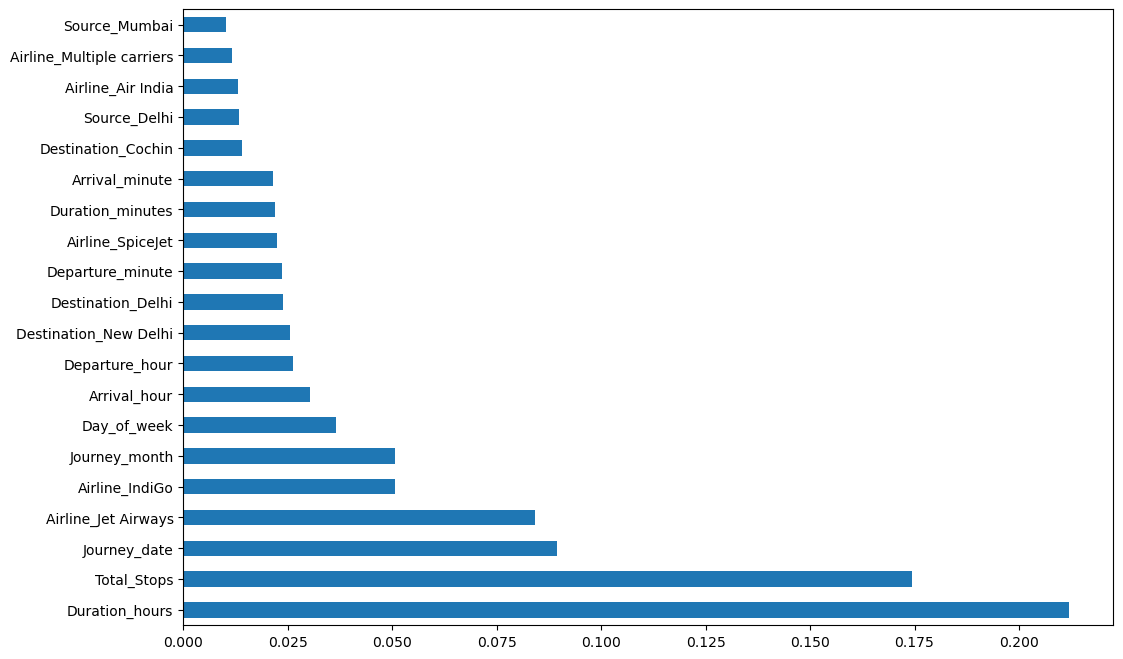

In [170]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(rf_tunned.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [171]:
 y_train_predict = best_rf_regressor.predict(X_train)
y_test_predict = best_rf_regressor.predict(X_test)

In [172]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Random Forest Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1013.1409026325348
Mean Squared Test Error:  2632370.4571977253
Root Mean Squared Train Error:  1622.4581526799775
R-squarred Train Error:  0.8776176975076319

Mean Absolute Test Error:  1296.0515419129233
Mean Squared Test Error:  4734500.1720744725
Root Mean Squared Test Error:  2175.8906617921944
R-squarred Test Error:  0.775637418826522


### Extra Tree Regressor

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}
tuned_et = RandomizedSearchCV(estimator=ExtraTreesRegressor(),
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1)
tuned_et.fit(X_train, y_train)
print("Best hyperparameters:", tuned_et.best_params_)
best_et_regressor = tuned_et.best_estimator_
print(best_et_regressor)
y_train_predict = best_et_regressor.predict(X_train)
y_test_predict = best_et_regressor.predict(X_test)

Best hyperparameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 65}
ExtraTreesRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=4,
                    min_samples_split=12, n_estimators=65)


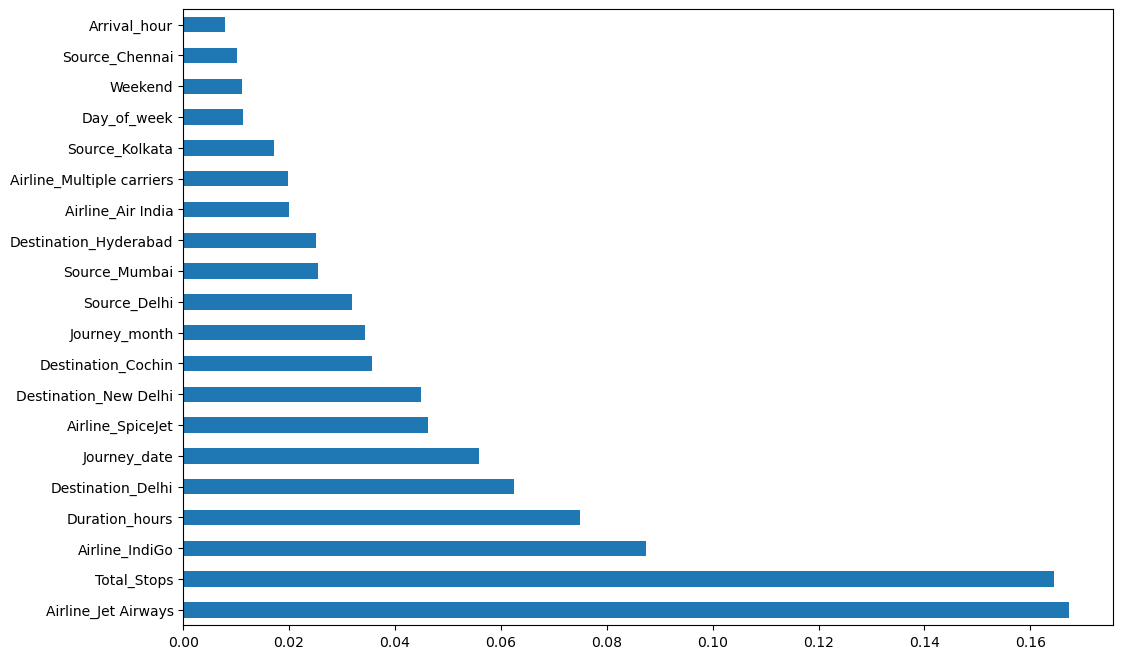

In [175]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(best_et_regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [176]:
mae_train = mean_absolute_error(y_train,y_train_predict)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predict)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predict)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predict)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predict)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predict)
print("R-squarred Test Error: ",r2_test)

models.append("Extra Trees Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1675.603647439526
Mean Squared Test Error:  6374017.578611972
Root Mean Squared Train Error:  2524.6816786700006
R-squarred Train Error:  0.7036636901677668

Mean Absolute Test Error:  1709.4820395781803
Mean Squared Test Error:  7117988.466140711
Root Mean Squared Test Error:  2667.9558591065015
R-squarred Test Error:  0.6626866180202021


## Bagging Regressor

In [177]:
from sklearn.ensemble import BaggingRegressor

In [183]:
base_model = DecisionTreeRegressor(random_state=42)
bag_reg = BaggingRegressor(estimator = base_model)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
}
tuned_bag_reg = GridSearchCV(estimator=bag_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
tuned_bag_reg.fit(X_train, y_train)
print(tuned_bag_reg.best_params_)
best_reg = tuned_bag_reg.best_estimator_
print(best_reg)
y_train_predicted = best_reg.predict(X_train)
y_test_predicted = best_reg.predict(X_test)


{'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100}
BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 max_features=0.8, max_samples=0.8, n_estimators=100)


In [184]:
mae_train = mean_absolute_error(y_train,y_train_predicted)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predicted)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predicted)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predicted)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predicted)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predicted)
print("R-squarred Test Error: ",r2_test)

models.append("Bagging Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  696.4632964346172
Mean Squared Test Error:  1319978.729633693
Root Mean Squared Train Error:  1148.9032725315446
R-squarred Train Error:  0.9386324839910675

Mean Absolute Test Error:  1250.5102305303578
Mean Squared Test Error:  4841833.588363214
Root Mean Squared Test Error:  2200.4166851674286
R-squarred Test Error:  0.7705510102407224


# Ada Boosting 

In [185]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor()
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}
tuned_ada_reg = RandomizedSearchCV(estimator=ada_reg,param_distributions=param_dist,n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
tuned_ada_reg.fit(X_train,y_train)
print("Best hyperparameters:",tuned_ada_reg.best_params_)
best_ada_reg = tuned_ada_reg.best_estimator_
print(best_ada_reg)
y_train_predicted = best_ada_reg.predict(X_train)
y_test_predicted = best_ada_reg.predict(X_test)

Best hyperparameters: {'n_estimators': 50, 'learning_rate': 0.1}
AdaBoostRegressor(learning_rate=0.1)


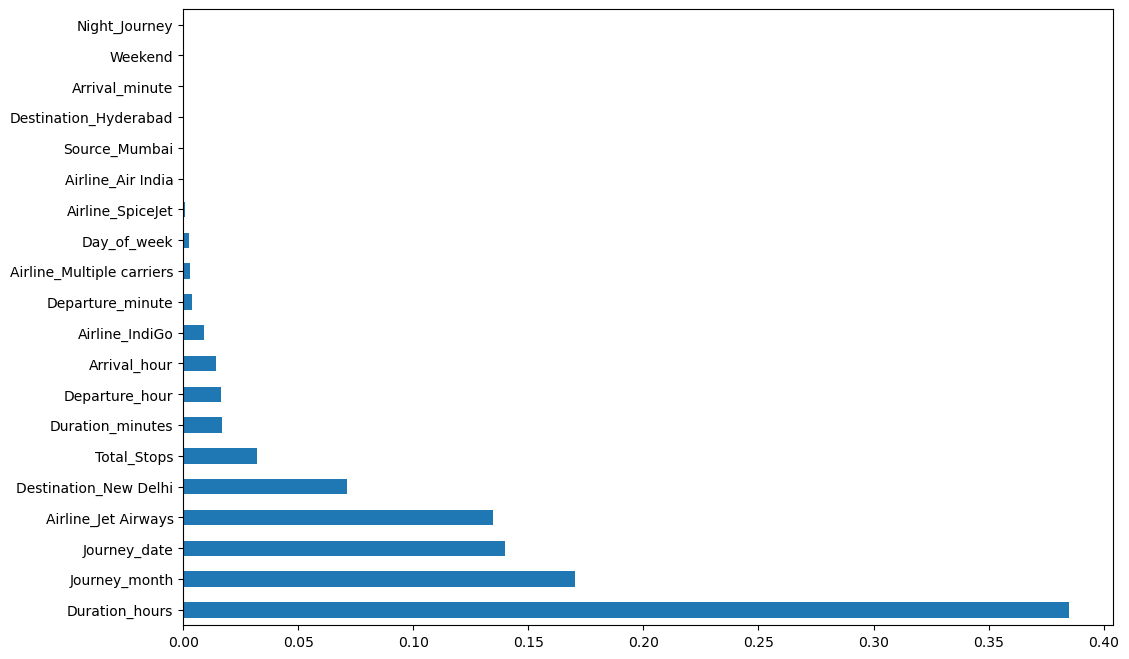

In [188]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(best_ada_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [186]:
mae_train = mean_absolute_error(y_train,y_train_predicted)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predicted)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predicted)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predicted)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predicted)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predicted)
print("R-squarred Test Error: ",r2_test)

models.append("Ada Boosting Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  2111.9169746958773
Mean Squared Test Error:  8183474.660562889
Root Mean Squared Train Error:  2860.677308009921
R-squarred Train Error:  0.619539693355398

Mean Absolute Test Error:  2130.950694650661
Mean Squared Test Error:  8744239.729370883
Root Mean Squared Test Error:  2957.0660678062104
R-squarred Test Error:  0.5856204193099213


## Gradient Boosting Regressor

In [187]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth': [3, 4, 5, 6, 7],
}
tuned_gb_reg = RandomizedSearchCV(estimator=gb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
tuned_gb_reg.fit(X_train,y_train)
print("Best hyperparameters:",tuned_gb_reg.best_params_)
best_gb_reg = tuned_gb_reg.best_estimator_
print(best_gb_reg)
y_train_predicted = best_gb_reg.predict(X_train)
y_test_predicted = best_gb_reg.predict(X_test)

Best hyperparameters: {'n_estimators': 110, 'max_depth': 6, 'learning_rate': 0.05}
GradientBoostingRegressor(learning_rate=0.05, max_depth=6, n_estimators=110)


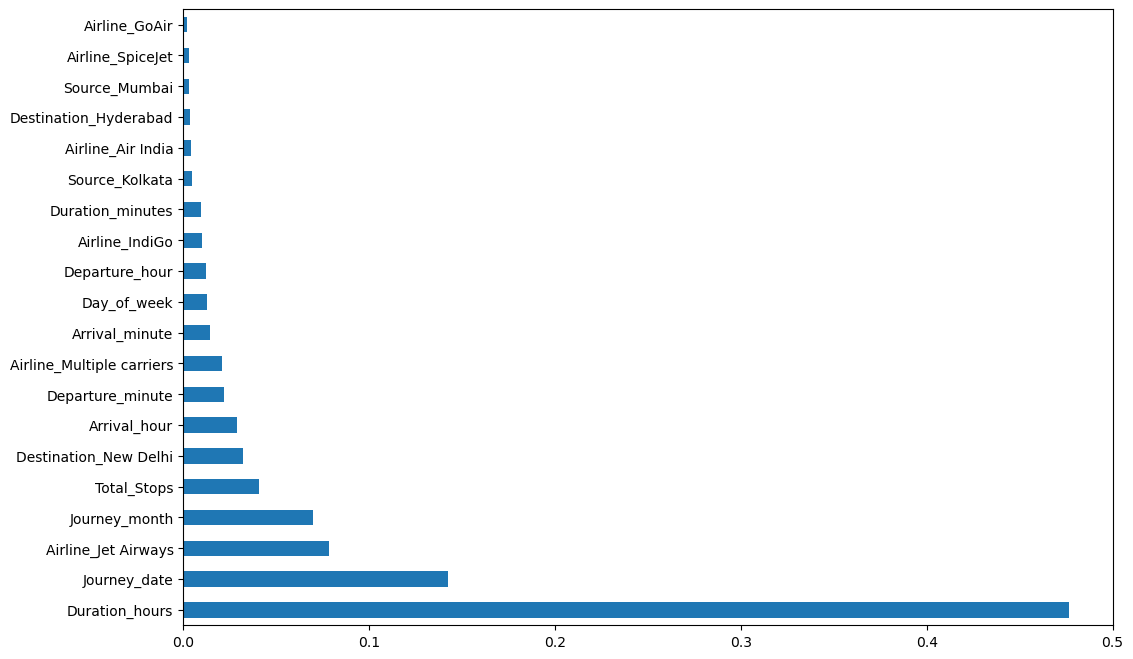

In [189]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(best_gb_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [190]:
mae_train = mean_absolute_error(y_train,y_train_predicted)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predicted)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predicted)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predicted)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predicted)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predicted)
print("R-squarred Test Error: ",r2_test)

models.append("Gradient Boosting Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1129.05319076988
Mean Squared Test Error:  2454771.261769175
Root Mean Squared Train Error:  1566.7709665963225
R-squarred Train Error:  0.8858745134880375

Mean Absolute Test Error:  1296.1563526810494
Mean Squared Test Error:  4459129.353840027
Root Mean Squared Test Error:  2111.6650666808
R-squarred Test Error:  0.788686928872661


## Extreme Boosting Regressor XG Boost

In [191]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth': [3, 4, 5, 6, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}
tuned_xgb_reg = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
tuned_xgb_reg.fit(X_train, y_train)
print("Best hyperparameters:",tuned_xgb_reg.best_params_)
best_xgb_reg = tuned_xgb_reg.best_estimator_
print(best_xgb_reg)
y_train_predicted = best_xgb_reg.predict(X_train)
y_test_predicted = best_xgb_reg.predict(X_test)

Best hyperparameters: {'n_estimators': 190, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=190, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


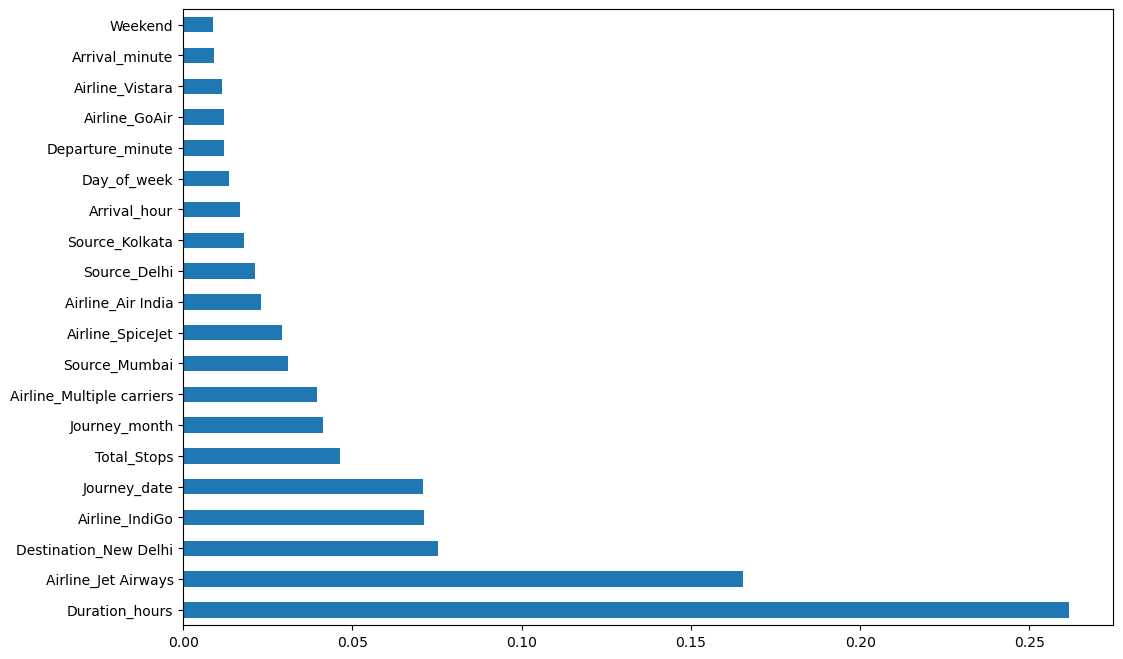

In [192]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(best_xgb_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [193]:
mae_train = mean_absolute_error(y_train,y_train_predicted)
print("Mean Absolute Train Error: ",mae_train)
mse_train = mean_squared_error(y_train,y_train_predicted)
print("Mean Squared Test Error: ",mse_train)
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Train Error: ",rmse_train)
r2_train = r2_score(y_train,y_train_predicted)
print("R-squarred Train Error: ",r2_train)

print()

mae_test = mean_absolute_error(y_test,y_test_predicted)
print("Mean Absolute Test Error: ",mae_test)
mse_test = mean_squared_error(y_test,y_test_predicted)
print("Mean Squared Test Error: ",mse_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Test Error: ",rmse_test)
r2_test = r2_score(y_test,y_test_predicted)
print("R-squarred Test Error: ",r2_test)

models.append("Extreme Gradient Boosting Regressor")
rmse_train_error = np.append(rmse_train_error,rmse_train)
r_squared_train_values.append(r2_train)
rmse_test_error = np.append(rmse_test_error,rmse_test)
r_squared_test_values.append(r2_test)

Mean Absolute Train Error:  1036.9194651990092
Mean Squared Test Error:  2184097.1345739453
Root Mean Squared Train Error:  1477.8691195684228
R-squarred Train Error:  0.8984585032607111

Mean Absolute Test Error:  1227.2867013980492
Mean Squared Test Error:  4098428.43107105
Root Mean Squared Test Error:  2024.457564650603
R-squarred Test Error:  0.8057801355730092


In [196]:
pd.DataFrame({"Models":models,"RMS_Train_Error":rmse_train_error,"R-Squared_Train":r_squared_train_values,"RMS_Test_Error":rmse_test_error,
     "R-Squared_Test" : r_squared_test_values      })

,Models,RMS_Train_Error,R-Squared_Train,RMS_Test_Error,R-Squared_Test
0,Linear Regression,2969.192024,0.590128,3.080443e+03,5.503211e-01
1,Ridge Regression,2969.226688,0.590118,3.080245e+03,5.503788e-01
2,RidgeCV Regression,2969.226688,0.590118,3.080245e+03,5.503788e-01
3,Lasso Regression,2969.209948,0.590123,3.080120e+03,5.504153e-01
4,LassoCV Regression,2969.337606,0.590088,3.079620e+03,5.505612e-01
5,ElasticnetCV Regression,2969.337606,0.590088,3.079620e+03,5.505612e-01
6,K Neighbors Regressor,2141.675028,0.786755,2.531998e+03,6.961893e-01
7,Radius Neighbors Regressor,1257.318736,0.926504,4.711249e+18,-1.051837e+30
8,Linear SVR,3092.826037,0.555284,3.155733e+03,5.280709e-01
9,SVR(Kernel='linear') Regression,3082.155862,0.558347,3.148246e+03,5.303075e-01


# Conclusion

1. The best model is XG Boost with a r2 of 0.805.

2. Some of the best feature are Duration_hours,Airline_Jet_Airways, Destination__New_Delhi.

Based on the analysis conducted, it was observed that various regression models were trained and tested using the provided dataset. After thorough evaluation, it was found that XGBoost consistently outperformed other models in terms of the \( R^2 \) score. This indicates that XGBoost was better able to capture the variation in the target variable compared to other models. Therefore, for this particular dataset, XGBoost is recommended as the preferred regression model due to its superior performance in predictive accuracy.